# 1: Pluralize nouns
Purpose: convert a singular noun (supplied by the user)
to its plural form.

Reference: https://www.grammarly.com/blog/plural-nouns/

In [ ]:
# Assignment 01, LING 360, Text Analytics in Python
# Updated on: 13-Jan-2022
# Author: Ryan Parker

# =========================
# Noun pluralizer
# =========================
'''
Purpose: convert a singular noun (supplied by the user)
to its plural form.
Reference: https://www.grammarly.com/blog/plural-nouns/
'''
# Add'l references, used in code for Rule 5:
# https://en.wikipedia.org/wiki/List_of_Unicode_characters
# https://www.w3schools.com/python/ref_func_chr.asp

print('Welcome to the noun pluralizer!',
'\nThis program returns the plural form of a singular noun you enter.\n', sep='')
singular_noun = input('Type a noun in its singular form: ')
singular_noun = singular_noun.lower()

# Create a list of consonants; used in Rule 5
consonants = [chr(code) for code in range(97,123) if chr(code) not in ['a', 'e', 'i', 'o', 'u']]

# Irregulars
irregular_nouns = {
    'child': 'children',
    'goose': 'geese',
    'woman': 'women',
    'man': 'men',
    'tooth': 'teeth',
    'foot': 'feet',
    'mouse': 'mice',
    'person': 'people'
}

# Determine plural form by examining the word ending
try:
    last_2_chars = singular_noun[-2:]
except IndexError:
    # word has fewer than 2 letters
    last_2_chars = None
last_1_char = singular_noun[-1]

# Rule 11: plural form is same as singular
if singular_noun in ['fish', 'deer', 'sheep', 'series', 'species']:
    plural_noun = singular_noun
# Check for irregulars
elif singular_noun in irregular_nouns.keys():
    plural_noun = irregular_nouns[singular_noun]
# Rule 8: change '-us' to '-i'
elif last_2_chars == 'us':
    plural_noun = singular_noun[:-2] + 'i'
# Rule 9: change '-is' to '-es'
elif last_2_chars == 'is':
    plural_noun = singular_noun[:-2] + 'es'
# Rules 2 and 7: add -es to make noun plural
elif last_1_char in ['s', 'x', 'z', 'o'] or last_2_chars in ['ss', 'sh', 'ch']:
    # check for exceptions
    if singular_noun in ['photo', 'piano', 'halo']:
        plural_noun = singular_noun + 's'
    else:
        plural_noun = singular_noun + 'es'
# Rule 4: change an '-f' or an '-fe' to 'v' prior to pluralizing
elif last_1_char == 'f' or last_2_chars == 'fe':
    # check for exceptions
    if singular_noun in ['roof', 'belief', 'chef', 'chief']:
        plural_noun = singular_noun + 's'
    else:
        if last_1_char == 'f':
            plural_noun = singular_noun[:-1] + 'ves'
        elif last_2_chars == 'fe':
            plural_noun = singular_noun[:-2] + 'ves'
# Rule 5: change '-y' to '-ies' if the letter before the '-y' is a consonant
elif last_2_chars in [char + 'y' for char in consonants]:
    plural_noun = singular_noun[:-1] + 'ies'
# Rule 10: change '-on' to '-a'
elif last_2_chars == 'on':
    plural_noun = singular_noun[:-2] + 'a'
# No strange rules used, so go with rule 1: just add '-s' to the end
else:
    plural_noun = singular_noun + 's'

# Return the result
print(plural_noun)

# Optional, if running from the Python terminal
# rather than Visual Studio Code.
# input('\nPress the [''Enter''] key to exit. ')

Welcome to the noun pluralizer!
This program returns the plural form of a singular noun you enter.

Type a noun in its singular form: analysis
analyses


# 2: Find nominalizations
Purpose: count all occurrences of a nomilzation, then return accuracy metrics (precision and recall).

Reference: http://www.dailywritingtips.com/nominalized-verbs/

## Precision and Recall

**[From Wikipedia:](https://en.wikipedia.org/wiki/Precision_and_recall)** "_Precision_ can be thought of as a measure of quality, and _recall_ as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned)."
* **Type I error, or False positive:** classifying something as _X_ when it really was _not X_. That is, you guessed _X_ (positive) and you were wrong (false).
* **Type II error, or False negative:** classifying something as _not X_ when it really was _X_. That is, you guessed _not X_ (negative) and you were wrong (false).

**Precision for classifying `X`**: `num_correct_Xs_guessed ÷ num_Xs_guessed`. Ranges from 0-1, with 1 as the best (there were no false posities). The reciprocal is false positive rate (the percentage of items guessed as `X` that were wrong).

**Recall for classifying `X`**: `num_correct_Xs_guessed ÷ num_true_Xs`. Ranges from 0-1, with 1 as the best (there were no false negatives). The reciprocal is false negative rate (the percentage of items guessed as `not X` that were wrong).

In [ ]:
# The text used in this example comes from the preamble, 
# first, and second sections of the United States Consitution. 
# Source: https://www.gutenberg.org/ebooks/5
input_txt = """
THE CONSTITUTION OF THE UNITED STATES OF AMERICA, 1787

We the people of the United States, in Order to form a more perfect Union,
establish Justice, insure domestic Tranquility, provide for the common defence,
promote the general Welfare, and secure the Blessings of Liberty to ourselves
and our Posterity, do ordain and establish this Constitution for the
United States of America.

Article 1

Section 1.  All legislative Powers herein granted shall be vested in a
Congress of the United States, which shall consist of a Senate and
House of Representatives.

Section 2.  The House of Representatives shall be composed of Members
chosen every second Year by the People of the several States,
and the electors in each State shall have the qualifications requisite
for electors of the most numerous branch of the State legislature.

No Person shall be a Representative who shall not have attained to the
Age of twenty five Years, and been seven Years a citizen of the United States,
and who shall not, when elected, be an Inhabitant of that State in which
he shall be chosen.

Representatives and direct Taxes shall be apportioned among
the several States which may be included within this Union,
according to their respective Numbers, which shall be determined
by adding to the whole number of free Persons, including those
bound to Service for a Term of Years, and excluding Indians not taxed,
three fifths of all other Persons.  The actual Enumeration shall be made
within three Years after the first Meeting of the Congress of the
United States, and within every subsequent Term of ten Years,
in such Manner as they shall by law Direct.  The number of
Representatives shall not exceed one for every thirty Thousand,
but each State shall have at least one Representative;
and until such enumeration shall be made, the State of New Hampshire
shall be entitled to chuse three, Massachusetts eight, Rhode Island
and Providence Plantations one, Connecticut five, New York six,
New Jersey four, Pennsylvania eight, Delaware one, Maryland six,
Virginia ten, North Carolina five, South Carolina five, and Georgia three.

When vacancies happen in the Representation from any State, the Executive
Authority thereof shall issue Writs of Election to fill such Vacancies.

The House of Representatives shall chuse their Speaker and other Officers;
and shall have the sole Power of Impeachment.
"""

tokens = input_txt.split()

print('Word count: ', len(tokens), sep='')

Word count: 387


In [ ]:
# Assignment 02, LING 360, Text Analytics in Python
# Updated on: 21-Jan-2022
# Author: Ryan Parker

# =========================
# Count nominalizations
# =========================
'''
Purpose: count the number of nominalizations in an input text.
Also returns information about accuracy: precision and recall.

Reference: http://www.dailywritingtips.com/nominalized-verbs/
Author: Ryan Parker
Updated on: 21-Jan-2022

Sample input text comes from the preamble and first two sections
of the United States Constitution.
Source: https://www.gutenberg.org/ebooks/5
'''
# Regular expressions module
import re

# First run the cell above to load a value for input_txt
print('Length of input text:', len(input_txt.split()), 'words\n')

# The true_nominalizations list is used for testing precision and recall
# I reviewed the text word-by-word to determine which words are
# true nominalizations. There may be errors, but I did my best.
true_nominalizations = [
    'CONSTITUTION', 'Union', 'Justice', 'Tranquility', 'defence',
    'Liberty', 'Posterity', 'Constitution', 'Section',
    'Representatives', 'Section', 'Representatives', 'electors',
    'qualifications', 'electors', 'legislature', 'Representative',
    'Inhabitant', 'Representatives', 'Union', 'Enumeration',
    'Meeting', 'Representatives', 'Representative', 'enumeration',
    'vacancies', 'Representation', 'Authority', 'Election', 'Vacancies',
    'Representatives', 'Speaker', 'Officers', 'Impeachment'
]


# Gerunds, words that end in '-ing'
# pattern: one or more alphanumeric characters 
# followed by -ing and then a word break.
pattern = r'\w+ing\b'
gerunds = re.findall(pattern=pattern, string=input_txt, flags=re.IGNORECASE)

# Agent nouns, which end in '-or' or '-er'
# pattern: two or more alphanumeric characters
# followed by -or(s) or -er(s) and then a word break.
pattern = r'\w{2,}(or|er)s?\b'  # or, r'\w+or[s]?\b|\w+er[s]?\b' to avoid use of capture groups
agent_nouns = [r.group() for r in re.finditer(
    pattern=pattern, string=input_txt, flags=re.IGNORECASE)]

# Recipient nouns, which end in '-ee'
# pattern: one or more alphanumeric characters (not 'thr' [from three])
# followed by -ee(s) and then a word break.
# See: https://stackoverflow.com/questions/977251/regular-expressions-and-negating-a-whole-character-group/977294
# for help using a "negative look-ahead" to eliminate sequences 
# that start with 'thr' and end in 'ee(s)' (that is, the word 'three(s)')
pattern = r'\w+ee[s]?\b'
recipient_nouns = re.findall(pattern=pattern, string=input_txt, flags=re.IGNORECASE)

# Others: words that end in -tion, -sion, -ment, -ence, -ance, and -tive
# pattern: one or more alphanumeric characters
# followed by -tion(s), -sion(s), -ment(s), -ence(s), -ance(s), -tive(s) and then a word break.
pattern = r'\w+(tion|sion|ment|ence|ance|tive)s?\b'
others = [r.group() for r in re.finditer(
    pattern=pattern, string=input_txt, flags=re.IGNORECASE)]

# Note, there are many others that are trickier to catch,
# like progress, overpass, surface, journey, dive, 
# workout, setup, record, vist, number, etc.
# I have not handled any of those tricky forms in this code.

# Combine all lists into a single one
all_nominalizations = []
all_nominalizations.extend(gerunds)
all_nominalizations.extend(agent_nouns)
all_nominalizations.extend(recipient_nouns)
all_nominalizations.extend(others)

# Determine the number of correct predictions
# ===========================================
# First, create word frequency dictionaries
true_dict = {}
for word in true_nominalizations:
    word = word.lower()
    if word in true_dict.keys():
        true_dict[word] += 1
    else:
        true_dict[word] = 1

predictions_dict = {}
for word in all_nominalizations:
    word = word.lower()
    if word in predictions_dict.keys():
        predictions_dict[word] += 1
    else:
        predictions_dict[word] = 1

# Next, count the times a word was correctly identified
correct_predictions = 0.0
for word in true_dict.keys():
    if word in predictions_dict.keys():
        correct_predictions += min(true_dict[word], predictions_dict[word])

incorrect_predictions = [word for word in predictions_dict.keys() if word not in true_dict.keys()]

# Compute accuracy
# =================
# precision (correct_predictions ÷ total_predictions)
acc_precision = correct_predictions / float(len(all_nominalizations))

# recall (correct_predictions ÷ true_nominalizations)
acc_recall = correct_predictions / float(len(true_nominalizations))


# Display results
print('True nominalizations:', len(true_nominalizations))
print('Predicted nominalizations:', len(all_nominalizations))
print('Precision:', f'{acc_precision:.2%}')
print('Recall:', f'{acc_recall:.2%}')
print('==========================\n')
print('True nominalizations:', true_nominalizations)
print('\nGerunds, count:', len(gerunds), '\n', gerunds)
print('\nAgent nouns, count:', len(agent_nouns), '\n', agent_nouns)
print('\nRecipient nouns, count:', len(recipient_nouns), '\n', recipient_nouns)
print('\nOthers, count:', len(others), '\n', others)
print('\n==========================\n')
print('Incorrect predictions:', incorrect_predictions)

Length of input text: 387 words

True nominalizations: 34
Predicted nominalizations: 43
Precision: 53.49%
Recall: 67.65%

True nominalizations: ['CONSTITUTION', 'Union', 'Justice', 'Tranquility', 'defence', 'Liberty', 'Posterity', 'Constitution', 'Section', 'Representatives', 'Section', 'Representatives', 'electors', 'qualifications', 'electors', 'legislature', 'Representative', 'Inhabitant', 'Representatives', 'Union', 'Enumeration', 'Meeting', 'Representatives', 'Representative', 'enumeration', 'vacancies', 'Representation', 'Authority', 'Election', 'Vacancies', 'Representatives', 'Speaker', 'Officers', 'Impeachment']

Gerunds, count: 5 
 ['according', 'adding', 'including', 'excluding', 'Meeting']

Agent nouns, count: 15 
 ['Order', 'Powers', 'Members', 'electors', 'electors', 'Numbers', 'number', 'other', 'after', 'Manner', 'number', 'Speaker', 'other', 'Officers', 'Power']

Recipient nouns, count: 0 
 []

Others, count: 23 
 ['CONSTITUTION', 'defence', 'Constitution', 'Section', '

# 3: Compare formal and informal texts
31-Jan-2022

**Purpose:** compare the word usage between formal and informal texts.

**Returns:** counts of the number of subject pronouns, contractions, and modal verbs across both the formal and informal texts.

**Text sources**
* **Formal:** ["The Love of God"](https://www.churchofjesuschrist.org/study/general-conference/2021/10/15christofferson?lang=eng) by Elder D. Todd Christofferson, October 2021 general conference, ChurchOfJesusChrist.org
* **Informal:** ["Simple Reminders for Finding Your Way through Life"](https://www.churchofjesuschrist.org/study/ya-weekly/2022/01/simple-reminders-for-finding-your-way-through-life?lang=eng) by Erin Murdock, YA Weekly, Jan 2022, ChurchOfJesusChrist.org


In [ ]:
# Informal text
informal_text = '''
Millions of people around the world watched on television as the first humans walked on the moon. My dad was one of them. Suddenly, at only age seven, he knew what he wanted to do with his life.

When he learned that many astronauts started out as fighter pilots, he decided right then what he wanted to focus on in school—aerospace engineering. He eventually became a fighter pilot in the United States Navy with the dream of becoming an astronaut.

While I was growing up, I felt like my life needed to be mapped out too. But it wasn’t so easy for me to decide what I wanted to do. I felt like I wasn’t smart enough, dedicated enough, or brave enough to set a course for my life and stick with it. To be honest, I still struggle with this sometimes.

As I’ve gotten older, I’ve learned that many young people feel the same way. Few people know exactly what path to take early on. Most of us figure it out as we go. And that’s all right! Thankfully, we don’t have to go it alone. There is help along the way.

Remember What Matters Most
Being unsure of what direction I wanted to take caused me to often feel uneasy. I felt that I should be doing something else or be somewhere else. I felt like there was just one thing that Heavenly Father wanted me to do, and if I missed it, I would derail my opportunities for eternity. As you can imagine, this created a lot of unnecessary anxiety in my life!

I’ve since learned that Heavenly Father has blessed each of us with spiritual gifts and that there are many good things we can do that will please Him. We don’t need to worry about finding the one and only path for our life. As long as we’re living the gospel and making and keeping sacred covenants, He will help us make the most of where we are now and know how to move forward.

Our Small Choices Add Up
When I received my patriarchal blessing, one part stood out to me—something that applies to all of us. I was reminded that getting to the celestial kingdom isn’t done by one decisive act or one great deed. It’s done in the choices—big and small—that we make each day, particularly as we choose to come unto Jesus Christ and live His gospel.

As we take action in all areas of our lives with faith in Heavenly Father and Jesus Christ, we put ourselves in a position to be guided. We’ll also find that wherever They lead us will be exactly where we want to be too.

Things Will Work Out
Even with the best-laid plans, things don’t always turn out the way we think they will. My dad’s life didn’t. He never became an astronaut, but he’d be the first to tell you that the Lord guided him to what was best for him and our family.
'''

In [ ]:
formal_text = '''
Our Heavenly Father loves us profoundly and perfectly. In His love, He created a plan, a plan of redemption and happiness to open to us all the opportunities and joys we are willing to receive, up to and including all that He has and is. To achieve this, He was even willing to offer His Beloved Son, Jesus Christ, as our Redeemer. “For God so loved the world, that he gave his only begotten Son, that whosoever believeth in him should not perish, but have everlasting life.” His is a Father’s pure love—universal to all yet personal to each.

Jesus Christ shares with the Father this same perfect love. When the Father first elaborated His great plan of happiness, He called for one to act as a Savior to redeem us—an essential part of that plan. Jesus volunteered, “Here am I, send me.” The Savior “doeth not anything save it be for the benefit of the world; for he loveth the world, even that he layeth down his own life that he may draw all men unto him. Wherefore, he commandeth none that they shall not partake of his salvation.”

This divine love should give us abundant comfort and confidence as we pray to the Father in the name of Christ. Not one of us is a stranger to Them. We need not hesitate to call upon God, even when we feel unworthy. We can rely on the mercy and merits of Jesus Christ to be heard. As we abide in God’s love, we depend less and less on the approval of others to guide us.

The Love of God Does Not Excuse Sin; Rather, It Offers Redemption
Because God’s love is all-embracing, some speak of it as “unconditional,” and in their minds they may project that thought to mean that God’s blessings are “unconditional” and that salvation is “unconditional.” They are not. Some are wont to say, “The Savior loves me just as I am,” and that is certainly true. But He cannot take any of us into His kingdom just as we are, “for no unclean thing can dwell there, or dwell in his presence.” Our sins must first be resolved.

Professor Hugh Nibley once noted that the kingdom of God cannot endure if it indulges even the smallest sin: “The slightest taint of corruption means that the other world would be neither incorruptible nor eternal. The tiniest flaw in a building, institution, code, or character will inevitably prove fatal in the long run of eternity.” The commandments of God are “strict” because His kingdom and its citizens can stand only if they consistently reject evil and choose good, without exception.

Elder Jeffrey R. Holland observed, “Jesus clearly understood what many in our modern culture seem to forget: that there is a crucial difference between the commandment to forgive sin (which He had an infinite capacity to do) and the warning against condoning it (which He never ever did even once).”

Despite our present imperfections, however, we can still hope to attain “a name and standing,” a place, in His Church and in the celestial world.
'''

In [ ]:
# True counts, used for calculating precision and recall
# Subject pronouns, informal
sp_i_truth = ['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I',
              'I', 'I', 'I', 'I', 'you', 'you', 'he', 'he', 'he', 'he', 'he',
              'He', 'He', 'He', 'he', 'we', 'we', 'we', 'We', 'we', 'we', 'we',
              'we', 'we', 'we', 'We', 'we', 'we', 'They', 'they']

# Subject pronouns, formal
sp_f_truth = ['I', 'I', 'He', 'He', 'He', 'he', 'He', 'he', 'he', 'he', 'he',
              'He', 'He', 'He', 'we', 'we', 'We', 'we', 'We', 'we', 'we', 'we',
              'we', 'they', 'they', 'They', 'they']

# Modal verbs, informal
mv_i_truth = ['can', 'can', 'should', 'would', 'will', 'will', 'will', 'Will',
              'will', 'need to', 'have to']

# Modal verbs, formal
mv_f_truth = ['can', 'can', 'can', 'can', 'may', 'may', 'should', 'should',
              'would', 'will', 'must', 'shall']

# Contractions, informal
c_i_truth = ["wasn't", "wasn't", "I've", "I've", "that's", "don't", "I've",
             "don't", "we're", "isn't", "It's", "We'll", "don't", "didn't",
             "he'd"]

# Contractions, formal
c_f_truth = []

## Accuracy function: precision and recall

In [ ]:
# ===============================================
# Calculate accuracy scores, precision and recall
# ===============================================
def accuracy(true_list, prediction_list):
    '''
    This function returns a dictionary with
    scores for precision and recall based on
    the inputs `true_list` and `prediction_list`.

    Return format
    ---
    ```
    {
        'precision': precision_score (float),
        'recall': recall_score (float)
    }
    ```

    Parameters
    ---
    `true_list`: list of str
        The list of all true positive strings.
    `prediction_list`: list of str
        The list of all predicted positive strings.

    Example
    ---
    ```
    >>> acc = accuracy(true_list=['A', 'A', 'b', 'c'], prediction_list=['A', 'a', 'b', 'b', 'C'])
    >>> acc['precision']
    ... 0.4
    >>> acc['recall']
    ... 0.5
    
    # Or, to see the calculation
    correct_predictions = ['A', 'b']
    precision = len(correct_predictions) / len(prediction_list) = 2/5 = 0.4
    recall = len(correct_predictions) / len(true_list) = 2/4 = 0.5
    ```

    Calculation
    ---
    precision = (num_correct_predictions / total_predictions)
    recall = (num_correct_predictions / num_true_values)
    '''
    # First, create word frequency dictionaries
    true_dict = {}
    for word in true_list:
        word = word.lower()
        if word in true_dict:
            true_dict[word] += 1
        else:
            true_dict[word] = 1

    predictions_dict = {}
    for word in prediction_list:
        word = word.lower()
        if word in predictions_dict:
            predictions_dict[word] += 1
        else:
            predictions_dict[word] = 1

    # Next, count the times a word was correctly identified.
    # The correct predictions for a word is the minimum of the true
    # word count and the predicted word count (e.g., if true count = 2
    # and predicted count = 3, the correct number of predictions was 2).
    correct_predictions = 0.0
    for word in true_dict:
        if word in predictions_dict:
            correct_predictions += min(true_dict[word], predictions_dict[word])

    # Compute accuracy
    # =================
    # precision (correct_predictions ÷ total_predictions)
    acc_precision = correct_predictions / float(len(prediction_list))

    # recall (correct_predictions ÷ true_list)
    if len(true_list) == 0:
        acc_recall = 1
        print('There were no values in true_list, so precision is 0% and recall is 100%')
    else:
        acc_recall = correct_predictions / float(len(true_list))

    return {'precision': acc_precision, 'recall': acc_recall}


In [ ]:
# Assignment 03, LING 360, Text Analytics in Python
# Updated on: 31-Jan-2022
# Author: Ryan Parker

# =================================
# Compare formal and informal texts
# =================================
'''
Purpose: compare the word usage between formal and informal texts.
Returns counts of the number of subject pronouns, contractions, 
and modal verbs across both the formal and informal texts.
Also returns information about accuracy: precision and recall.

Author: Ryan Parker
Updated on: 31-Jan-2022

Sample input texts:
1. Informal: "Simple Reminders for Finding Your Way through Life" 
by Erin Murdock, YA Weekly, Jan 2022, ChurchOfJesusChrist.org. 
https://www.churchofjesuschrist.org/study/ya-weekly/2022/01/simple-reminders-for-finding-your-way-through-life?lang=eng
2. Formal: "The Love of God" by Elder D. Todd Christofferson
October 2021 general conference, ChurchOfJesusChrist.org
https://www.churchofjesuschrist.org/study/general-conference/2021/10/15christofferson?lang=eng
'''
# Regular expressions module
import re

# Replace single left or right apostrophe marks (common in text from webpages)
# with a single apostrophe.
# See: https://stackoverflow.com/questions/24358361/removing-u2018-and-u2019-character
# \u2018 = ‘ and \u2019 = ’
informal_text = re.sub(pattern=r'(\u2018|\u2019)', repl="'", string=informal_text)
formal_text = re.sub(pattern=r'(\u2018|\u2019)', repl="'", string=formal_text)
print('Word count, informal text:', len(informal_text.split()), 'words')
print('Word count, formal text:', len(formal_text.split()), 'words\n')

# See: https://www.grammarly.com/blog/the-basics-on-subject-and-object-pronouns-b/
# Or, the complete list: https://en.wikipedia.org/wiki/Subject_pronoun
subject_pronouns = ['I', 'you', 'she', 'he', 'we', 'they', 'who']
# See: https://www.grammarly.com/blog/modal-verbs/
modal_verbs = ['can', 'may', 'might', 'could', 'should', 'would', 'will',
               'must', 'shall', 'ought to', 'got to', 'need to', 'have to']

# Produce lists (to be counted later using len())
# sp = subject pronouns
sp_i = []
sp_f = []
for word in subject_pronouns:
    sp_i.extend(re.findall(
        pattern=r'\b' + word + r'\b',
        string=informal_text,
        flags=re.IGNORECASE))
    sp_f.extend(re.findall(
        pattern=r'\b' + word + r'\b',
        string=formal_text,
        flags=re.IGNORECASE))

# mv = modal verbs
mv_i = []
mv_f = []
for word in modal_verbs:
    mv_i.extend(re.findall(
        pattern=r'\b' + word + r'\b',
        string=informal_text,
        flags=re.IGNORECASE))
    mv_f.extend(re.findall(
        pattern=r'\b' + word + r'\b',
        string=formal_text,
        flags=re.IGNORECASE))

# c_ = contractions
# Count contractions by searching for apostrophes between other letters
c_i = re.findall(pattern=r"\w+'\w+", string=informal_text)
c_f = re.findall(pattern=r"\w+'\w+", string=formal_text)

# Calculate precision and recall, using function defined above
acc_sp_i = accuracy(true_list=sp_i_truth, prediction_list=sp_i)
acc_sp_f = accuracy(true_list=sp_f_truth, prediction_list=sp_f)
acc_mv_i = accuracy(true_list=mv_i_truth, prediction_list=mv_i)
acc_mv_f = accuracy(true_list=mv_f_truth, prediction_list=mv_f)
acc_c_i = accuracy(true_list=c_i_truth, prediction_list=c_i)
acc_c_f = accuracy(true_list=c_f_truth, prediction_list=c_f)

# Return counts as printed tables
print('=================+==========+========================+')
print('Type: Informal   |  Count   |  Precision  |  Recall  |')
print('-----------------+----------+-------------+----------|')
print(f'Subject pronouns |{len(sp_i):^10}|{acc_sp_i["precision"]:^13.0%}|{acc_sp_i["recall"]:^10.0%}|')
print('-----------------+----------+-------------+----------|')
print(f'Modal verbs      |{len(mv_i):^10}|{acc_mv_i["precision"]:^13.0%}|{acc_mv_i["recall"]:^10.0%}|')
print('-----------------+----------+-------------+----------|')
print(f'Contractions     |{len(c_i):^10}|{acc_c_i["precision"]:^13.0%}|{acc_c_i["recall"]:^10.0%}|')
print('=================+==========+=============+==========+')

print('\n')
print('=================+==========+========================+')
print('Type: Formal     |  Count   |  Precision  |  Recall  |')
print('-----------------+----------+-------------+----------|')
print(f'Subject pronouns |{len(sp_f):^10}|{acc_sp_f["precision"]:^13.0%}|{acc_sp_f["recall"]:^10.0%}|')
print('-----------------+----------+-------------+----------|')
print(f'Modal verbs      |{len(mv_f):^10}|{acc_mv_f["precision"]:^13.0%}|{acc_mv_f["recall"]:^10.0%}|')
print('-----------------+----------+-------------+----------|')
print(f'Contractions     |{len(c_f):^10}|{acc_c_f["precision"]:^13.0%}|{acc_c_f["recall"]:^10.0%}|')
print('=================+==========+=============+==========+')

Word count, informal text: 501 words
Word count, formal text: 518 words

There were no values in true_list, so precision is 0% and recall is 100%
=================+==========+========================+
Type: Informal   |  Count   |  Precision  |  Recall  |
-----------------+----------+-------------+----------|
Subject pronouns |    43    |    100%     |   100%   |
-----------------+----------+-------------+----------|
Modal verbs      |    11    |    100%     |   100%   |
-----------------+----------+-------------+----------|
Contractions     |    16    |     94%     |   100%   |
=================+==========+=============+==========+


=================+==========+========================+
Type: Formal     |  Count   |  Precision  |  Recall  |
-----------------+----------+-------------+----------|
Subject pronouns |    27    |    100%     |   100%   |
-----------------+----------+-------------+----------|
Modal verbs      |    12    |    100%     |   100%   |
-----------------+---------

# 4: Compare categories in a text corpus
2-Feb-2022

Using the `Mini-CORE_new.zip` archive (Corpus of Online Registers of English), which contains 1,600 texts evenly separated between 8 categories, choose 3 linguistic features and compare their normalized occurence across the categories.

These are the "registers," or categories, in the corpus:
* HI: How-to/Instructional
* ID: Interactive Discussion
* IN: Informational (Wikipedia)
* IP: Informational Persuasion
* LY: Song Lyrics
* NA: News reports
* OP: Opinion blogs
* SP: Interview transcripts

In [ ]:
# Assignment 04, LING 360, Text Analytics in Python
# Updated on: 2-Feb-2022
# Author: Ryan Parker

# =======================================
# Compare categories in an English corpus
# =======================================
'''
Purpose: compare three linguistic features across 8 categories of
text in an English corpus with 1,600 documents.

Output: a .csv file with normalized counts for each linguistic
feature across the 8 categories.

Also includes accuracy information (precision and recall) for a
single document to test the performance of the RegEx patterns used.

Author: Ryan Parker
Updated on: 2-Feb-2022

Note: the code in this module assumes the `Mini-CORE_new.zip` file
is saved in the current working directory.

Linguistic features compared:
1. Subject pronouns
2. Contractions
3. Proper nouns
4. Average word length (in characters)
5. Average sentence length (in words)
'''
# re module for RegEx searches, os module for working with files, 
# zipfile for extracting .zip file, csv for writing results to a
# .csv file, and statistics module for computing averages
import re, os, zipfile, csv, statistics

# ==============================================
# Locate and unzip the Mini-CORE_new.zip archive
# ==============================================
cur_dir = os.getcwd()
zip_path = cur_dir + '/Mini-CORE_new.zip'

# Unzip the file
# See: https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5/56850153#56850153
zipfile.ZipFile(zip_path).extractall()

# =============================================
# Loop through all files in the unzipped folder
# =============================================
# Create a dictionary to store the counts
# Keys are the category (register) names, and values are
# a sub-dictionary with keys for each linguistic feature
# and values showing the count of that feature.
data_dict = {
    'HI': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'ID': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'IN': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'IP': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'LY': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'NA': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'OP': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []},
    'SP': {'sub_pronouns': [], 'contractions': [], 'proper_nouns': [], 'word_count': [], 'sent_count': [], 'avg_word_length': [], 'avg_sent_length': []}
}

# List subject pronouns
# See: https://en.wikipedia.org/wiki/Subject_pronoun
subject_pronouns = ['I', 'you', 'she', 'he', 'we', 'they', 'who']

# For contractions, here's a RegEx pattern to find apostrophes between other letters
# r"\w+'\w+"

# RegEx pattern to find proper nouns: words that start with a capital
# letter, followed by at least one lowercase letter, and not at the beginning
# of a line or a sentence (that is, not preceded by ". ", "? ", or "! ").
# Here, I use a "verbose" pattern with comments.
# See: https://docs.python.org/3/library/re.html#re.X
prop_nouns = r'''
    (?<![.?!]\s)    # negative look-behind assertion: don't match after the end of a sentence
    (?<!\A)         # "": don't match at the beginning of the string
    (?<!\n\s)       # "": don't match directly after a newline
    [A-Z]\w+\b      # match 1 capital letter followed by 1 or more alphanumeric characters and a word boundary'''
# Demonstration: https://pythex.org/?regex=(%3F%3C!%5B.%3F!%5D%5Cs)(%3F%3C!%5CA)(%3F%3C!%5Cn)%5BA-Z%5D%5Cw%2B%5Cb&test_string=Hi!%20I%20am%20happy%20to%20see%20you.%20I%27m%20from%20Texas.%20My%20name%20is%20Zach.%20What%27s%20your%20name%3F%0A%0AMy%20name%20is%20John.%0A%0APleasure%20to%20meet%20you%2C%20John.%20Where%20are%20you%20from%3F%0A%0AGeorgia.&ignorecase=0&multiline=0&dotall=0&verbose=0


corpus_dir = cur_dir + '/Mini-CORE_new'
for one_file in os.listdir(corpus_dir):
    if one_file.endswith('.txt'):
        # Get the 2-letter category code from the filename
        category = one_file[2:4]
        # Open the file; note the encoding is not UTF-8, but cp437, 
        # as noted by Dr. Brown.
        # See: https://docs.python.org/3/library/codecs.html#standard-encodings
        with open(corpus_dir + '/' + one_file, mode='rt', encoding='cp437') as txt_file:
            # Store the file's contents in a variable
            all_text = txt_file.read()
        
        # Remove any text between angle brackets (<>), non-greedy
        all_text = re.sub(pattern=r'<.*?>', repl='', string=all_text)
        # Count words
        all_words = [wrd for wrd in re.split(r'\W+', string=all_text) if wrd != '']
        data_dict[category]['word_count'].append(len(all_words))
        # Count number of characters in the words
        total_chars = sum([len(wrd) for wrd in all_words])
        data_dict[category]['avg_word_length'].append(total_chars)
        # Count sentences, which end in either: ., !, or ? (optionally: ") and a space
        all_sents = [sent for sent in re.split(r'[.?!]["]?\s', string=all_text) if sent != '']
        data_dict[category]['sent_count'].append(len(all_sents))
        # Count subject pronouns
        sp = sum([len(re.findall(pattern=r'\b' + wrd + r'\b', string=all_text, flags=re.I)) for wrd in subject_pronouns])
        data_dict[category]['sub_pronouns'].append(sp)
        # Count contractions
        cont = len(re.findall(pattern=r"\w+'\w+", string=all_text))
        data_dict[category]['contractions'].append(cont)
        # Count proper nouns
        pn = len(re.findall(pattern=prop_nouns, string=all_text, flags=re.VERBOSE))
        data_dict[category]['proper_nouns'].append(pn)

# ==================================
# Calculate averages and proportions
# ==================================
# In this section, I overwrite values in the data_dict,
# replacing them with category-level averages

for catg in data_dict:
    # Calculate the average word length (characters per word)
    # using the total character count stored in the 
    # 'avg_word_length' list and the total word count
    # stored in the 'word_count' list
    chars = sum(data_dict[catg]['avg_word_length'])
    wrds = sum(data_dict[catg]['word_count'])
    data_dict[catg]['avg_word_length'] = chars / wrds

    # Calculate the average sentence length (words per sentence)
    sents = sum(data_dict[catg]['sent_count'])
    data_dict[catg]['avg_sent_length'] = wrds / sents

    # Calculate subject pronouns per word
    sp = sum(data_dict[catg]['sub_pronouns'])
    data_dict[catg]['sub_pronouns'] = sp / wrds

    # Calculate contractions per word
    cont = sum(data_dict[catg]['contractions'])
    data_dict[catg]['contractions'] = cont / wrds

    # Calculate proper nouns per word
    pn = sum(data_dict[catg]['proper_nouns'])
    data_dict[catg]['proper_nouns'] = pn / wrds

    # Overwrite total words and total sentences
    data_dict[catg]['word_count'] = wrds
    data_dict[catg]['sent_count'] = sents

# ================================
# Save normalized values as a .csv
# ================================
header_row = ['Register'] + [key for key in data_dict['HI']]
normalized_factor = 1000
with open('Parker_04.csv', mode='wt') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(header_row)
    for catg in data_dict:
        # Normalize values (rates of occurrence per 1000 words)
        for col in ['sub_pronouns', 'contractions', 'proper_nouns']:
            data_dict[catg][col] = data_dict[catg][col] * normalized_factor
        # Create row for csv file
        one_row = [catg] + [val for val in data_dict[catg].values()]
        # Alternate version: single-step list comprehension, eliminates the normalizing step
        # one_row = [catg] + [val*normalized_factor if key in ['sub_pronouns', 'contractions', 'proper_nouns'] else val for key, val in data_dict[catg].items()]
        csv_writer.writerow(one_row)

## Calculate accuracy
Return the precision and recall scores for a given text document.

The main problem is when proper nouns occur at the beginning of a sentence. Right now, the RegEx pattern does not count capitalized words at the beginning of a sentence or at the beginning of a line.

In [ ]:
import os, re
cur_dir = os.getcwd()
file_name = '1+HI+HT+HI-HI-HI-HI+FH-HT-HT-HT+NNNN+0142743.txt'

# Lists of true values
# Subject pronouns
sp_truth = ['I', 'I', 'I', 'I', 'you', 'you', 'you', 'you', 'You', 'you',
            'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you',
            'you', 'you', 'you', 'You', 'you', 'you', 'you']

# Contractions
cont_truth = ["What's", "you'll"]

# Proper nouns
pn_truth = ['ANZ', 'Internet', 'Banking', 'ANZ', 'Internet',
            'Banking', 'ANZ', 'ANZ', 'Internet', 'Banking', 'Customer',
            'Registration', 'Number', 'CRN', 'Telecode', 'ANZ', 'Phone',
            'Banking', 'ANZ', 'Phone', 'Banking', 'CRN', 'Telecode',
            'ANZ', 'Internet', 'Banking', 'CRN', 'ANZ',
            'Customer', 'Service', 'Consultant', 'ANZ',
            'Internet', 'Banking', 'ANZ', 'Internet', 'Banking', 'ANZ',
            'Internet', 'Banking', 'CRN', 'Telecode', 'CRN', 'Telecode',
            'CRN', 'Telecode', 'ANZ', 'Internet', 'Banking',
            'ANZ', 'Phone', 'Banking', 'CRN', 'Telecode', 'ANZ',
            'Internet', 'Banking', 'CRN', 'CRN', 'ANZ', 'Internet',
            'Banking', 'CRN', 'CRN', 'ANZ', 'Customer',
            'Service', 'Consultant', 'ANZ', 'Card', 'ANZ', 'Internet',
            'Banking', 'ANZ', 'Internet', 'Banking', 'Pay',
            'Anyone', 'Security', 'Device', 'ANZ', 'Internet', 'Banking',
            'Pay', 'Anyone', 'Security', 'Device', 'Operators', 'ANZ',
            'Internet', 'Banking', 'Business', 'ANZ', 'Internet',
            'Banking', 'ANZ', 'Internet', 'Banking', 'CRN', 'ANZ',
            'Internet', 'Banking', 'ANZ', 'Internet', 'Banking', 'Help',
            'FAQs', 'ANZ', 'Internet', 'Banking', 'Log', 'ANZ',
            'Internet', 'Banking', 'Business', 'Administrators', 'Authorisers',
            'ANZ', 'Multiple', 'Payments', 'ANZ', 'Internet',
            'Banking', 'ANZ', 'Multiple', 'Payments', 'Electronic',
            'Transaction', 'Business', 'Mortgage', 'Loan', 'Offset',
            'Electronic', 'Transactions', 'ANZ', 'Business', 'Classic', 'ANZ',
            'Business', 'Extra', 'ANZ', 'Revolving', 'Agri', 'Line', 'ANZ',
            'Negotiator', 'ANZ', 'Security', 'Device', 'Code', 'Security',
            'Device']

# List of subject pronouns
# See: https://en.wikipedia.org/wiki/Subject_pronoun
subject_pronouns = ['I', 'you', 'she', 'he', 'we', 'they', 'who']
prop_nouns = r'''
    (?<![.?!]\s)    # negative look-behind assertion: don't match after the end of a sentence
    (?<!\A)         # "": don't match at the beginning of the string
    (?<!\n\s)       # "": don't match directly after a newline
    [A-Z]\w+\b      # match 1 capital letter followed by 1 or more lowercase letters and a word boundary'''

with open(cur_dir + '/Mini-CORE_new/' + file_name, mode='rt', encoding='cp437') as txt_file:
    # Store the file's contents in a variable
    all_text = txt_file.read()

# Remove any text between angle brackets (<>), non-greedy
all_text = re.sub(pattern=r'<.*?>', repl='', string=all_text)

# Count words
all_words = [wrd for wrd in re.split(r'\W+', string=all_text) if wrd != '']
print('Word count:', len(all_words))

# Count sentences, which end in either: ., !, or ? (optionally: ") and a space
all_sents = [sent for sent in re.split(r'[.?!]["]?\s', string=all_text) if sent != '']
print('Sentence count:', len(all_sents))

# List subject pronouns
sp = []
for wrd in subject_pronouns:
    sp.extend(re.findall(pattern=r'\b' + wrd + r'\b', string=all_text, flags=re.I))
acc = accuracy(true_list=sp_truth, prediction_list=sp)
print('\nSubject pronouns, count:', len(sp), '\nList:', sp, 
      '\nPrecision:', acc['precision'], '\nRecall:', acc['recall'])

# List contractions
cont = re.findall(pattern=r"\w+'\w+", string=all_text)
acc = accuracy(true_list=cont_truth, prediction_list=cont)
print('\nContractions, count:', len(cont), '\nList:', cont, 
      '\nPrecision:', acc['precision'], '\nRecall:', acc['recall'])

# list proper nouns
pn = re.findall(pattern=prop_nouns, string=all_text, flags=re.VERBOSE)
acc = accuracy(true_list=pn_truth, prediction_list=pn)
print('\nProper nouns, count:', len(pn), '\nList:', pn, 
      '\nPrecision:', acc['precision'], '\nRecall:', acc['recall'])

Word count: 690
Sentence count: 35

Subject pronouns, count: 26 
List: ['I', 'I', 'I', 'I', 'you', 'you', 'you', 'you', 'You', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'You', 'you', 'you', 'you'] 
Precision: 1.0 
Recall: 1.0

Contractions, count: 3 
List: ["What's", "you'll", "customer's"] 
Precision: 0.6666666666666666 
Recall: 1.0

Proper nouns, count: 157 
List: ['ANZ', 'Internet', 'Banking', 'NZ', 'Internet', 'Banking', 'ANZ', 'ANZ', 'Internet', 'Banking', 'Customer', 'Registration', 'Number', 'CRN', 'Telecode', 'NZ', 'Phone', 'Banking', 'ANZ', 'Phone', 'Banking', 'CRN', 'Telecode', 'ANZ', 'Internet', 'Banking', 'CRN', 'ANZ', 'Customer', 'Service', 'Consultant', 'ANZ', 'Internet', 'Banking', 'ANZ', 'Internet', 'Banking', 'ANZ', 'Internet', 'Banking', 'CRN', 'Telecode', 'CRN', 'Telecode', 'CRN', 'Telecode', 'ANZ', 'Internet', 'Banking', 'International', 'ANZ', 'Phone', 'Banking', 'CRN', 'Telecode', 'ANZ', 'Internet', 'Banking', 'CRN'

# 5: Word frequency distribution across categories in a corpus
19-Feb-2022

Using the `Mini-CORE_new.zip` archive (Corpus of Online Registers of English), which contains 1,600 texts evenly separated between 8 categories, create .csv files with word-frequency distributions from each category, excluding stopwords (words with little lexical meaning).

These are the 8 "registers," or categories, in the corpus:
1. HI: How-to/Instructional
2. ID: Interactive Discussion
3. IN: Informational (Wikipedia)
4. IP: Informational Persuasion
5. LY: Song Lyrics
6. NA: News reports
7. OP: Opinion blogs
8. SP: Interview transcripts

Practice cells for getting familiar with NLTK

In [ ]:
import nltk
nltk.download('punkt', quiet=True)

some_text = "Early in the morning, John and Peter ran to the seplulchre."
sample_tokens = nltk.word_tokenize(some_text)
print(sample_tokens)

['Early', 'in', 'the', 'morning', ',', 'John', 'and', 'Peter', 'ran', 'to', 'the', 'seplulchre', '.']


In [ ]:
nltk.download('stopwords', quiet=True)
len(nltk.corpus.stopwords.words('english'))

179

Program to turn in

In [ ]:
# Assignment 05, LING 360, Text Analytics in Python
# Updated on: 19-Feb-2022
# Author: Ryan Parker

# =======================================
# Compare categories in an English corpus
# =======================================
'''
Author: Ryan Parker
Updated on: 19-Feb-2022

Purpose: compare word frequency distributions across
8 categories of text in an English corpus with 1,600 documents.

Output: 8 .csv files with word frequency counts (listed in
descending order by counts) across the 8 categories, or registers.

Note: the code in this module assumes the `Mini-CORE_new.zip` file
is saved in the current working directory.

Categories, or registers, in the corpus:
1. HI: How-to/Instructional
2. ID: Interactive Discussion
3. IN: Informational (Wikipedia)
4. IP: Informational Persuasion
5. LY: Song Lyrics
6. NA: News reports
7. OP: Opinion blogs
8. SP: Interview transcripts
'''
# re module for RegEx searches, os module for working with files, 
# zipfile for extracting .zip file, csv for writing results to
# .csv files, and nltk for stopwords list and tokenizing
import re, os, zipfile, csv, nltk

# Download the dependency required for word tokenizing.
# quiet=True tells NLTK to not print any outputs
nltk.download('punkt', quiet=True)

# Download the stopwords list from NLTK
nltk.download('stopwords', quiet=True)

# Store stopwords in a list
stopwords_list = nltk.corpus.stopwords.words('english')


# ==============================================
# Locate and unzip the Mini-CORE_new.zip archive
# ==============================================
cur_dir = os.getcwd()
zip_path = cur_dir + '/Mini-CORE_new.zip'

# Unzip the file
# See: https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5/56850153#56850153
zipfile.ZipFile(zip_path).extractall()

# =============================================
# Loop through all files in the unzipped folder
# =============================================
# Create a dictionary to store the counts
# Keys are the category (register) names, and values are
# a sub-dictionary with keys for each unique word and
# values representing how many times each word occurred.
data_dict = {
    'HI': {},
    'ID': {},
    'IN': {},
    'IP': {},
    'LY': {},
    'NA': {},
    'OP': {},
    'SP': {}
}

corpus_dir = cur_dir + '/Mini-CORE_new'
for one_file in os.listdir(corpus_dir):
    if one_file.endswith('.txt'):
        # Get the 2-letter category code from the filename
        category = one_file[2:4]
        # Open the file; note the encoding is not UTF-8, but cp437, 
        # as noted by Dr. Brown.
        # See: https://docs.python.org/3/library/codecs.html#standard-encodings
        with open(corpus_dir + '/' + one_file, mode='rt', encoding='cp437') as txt_file:
            # Store the file's contents in a variable
            all_text = txt_file.read()
        
        # Remove any text between angle brackets (<>), non-greedy.
        # This strips the heading lines and removes HTML formatting tags.
        all_text = re.sub(pattern=r'<.*?>', repl='', string=all_text)

        # Split text into words, using any non-alphanumeric character
        # as the delimeter (i.e., [^A-Za-z0-9_])
        all_words = [wrd.lower() for wrd in re.split(r'\W+', string=all_text) if wrd != '']

        # Alternative version (preserves punction, which isn't desirable
        # for this task)
        # Tokenize text (split into words and punctuation)
        # all_words = nltk.word_tokenize(all_text)

        # Update the word frequency distribution
        for wrd in all_words:
            if wrd not in stopwords_list:
                if wrd in data_dict[category]:
                    # increment the word's count by 1
                    data_dict[category][wrd] += 1
                else:
                    # create a new key with count of 1
                    data_dict[category][wrd] = 1

print('Finished creating word frequency counts. Saving to .csv files...')

# =================================================
# Save sorted frequency distributions as .csv files
# =================================================

# Track top 20 words across each category for quick comparison
top_words = {
    'HI': [],
    'ID': [],
    'IN': [],
    'IP': [],
    'LY': [],
    'NA': [],
    'OP': [],
    'SP': []
}

for catg in data_dict:
    # Sort the dictionary by word count.
    # See: Jake VanderPlas's A Whirldwind Tour of Python, Ch. 08, "Defining Functions: Anonymous lambda Functions"
    # https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html#Anonymous-(lambda)-Functions
    # Returns a list of tuples in the form [('word1', count), ('word2', count)]
    sorted_distribution = sorted(data_dict[catg].items(), key=lambda item: item[1], reverse=True)

    # Add to top-20 words list
    for wrd in sorted_distribution[:20]:
        top_words[catg].append(wrd)

    # Iterate through the list and write to .csv file
    with open('word_frequencies_' + catg + '.csv', mode='wt') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Word', 'Count'])
        for word_count in sorted_distribution:
            csv_writer.writerow(list(word_count))

# Create a .csv file for the top-20 word comparison
with open('word_freq_comp.csv', mode='wt') as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write header row
    csv_writer.writerow(top_words.keys())
    # Write data rows
    for row_num in range(20):
        csv_writer.writerow([top_words[catg][row_num] for catg in top_words.keys()])

# ================================================
# Create a single .zip file with all 8 .csv files
# ================================================
# See: https://www.kite.com/python/examples/3416/zipfile-compress-files-into-a-zip-file
# Also: https://docs.python.org/3/library/zipfile.html#zipfile-objects

# Uses the "with ... as ___" context manager to handle opening and closing the .zip archive
with zipfile.ZipFile('word_freq.zip', mode='w') as zf:
    for catg in data_dict:
        filename = 'word_frequencies_' + catg + '.csv'
        zf.write(filename)
    # Add the comparison csv file
    zf.write('word_freq_comp.csv')

print('Complete! .csv files saved to word_freq.zip in the current directory')

Finished creating word frequency counts. Saving to .csv files...
Complete! .csv files saved to word_freq.zip in the current directory


# 7: Compare categories based on bigram frequency
5-Mar-2022

Using the `AWE_untagd.zip` archive, create .csv files with noun-bigram frequency distributions from each category, focusing on common nouns only (no proper nouns).

These are the 6 "registers," or categories, in the corpus:
1. JA_BI
2. JA_HI
3. PS_BI
4. PS_HI
5. TB_BI
6. TB_HI


## Resources
* NLTK book, [Chapter 5, Categorizing and Tagging Words](https://www.nltk.org/book/ch05.html)

## NLTK practice: part-of-speech tagging

In [ ]:
import nltk
nltk.download('punkt', quiet=True)

some_text = "Early in the morning, John and Peter ran to the seplulchre."
sample_tokens = nltk.word_tokenize(some_text)
print(sample_tokens)

['Early', 'in', 'the', 'morning', ',', 'John', 'and', 'Peter', 'ran', 'to', 'the', 'seplulchre', '.']


Apply part-of-speech tagging to each word token in the input.

In [ ]:
# Required for NLTK's default part-of-speech tagger
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)

# nltk.pos_tag(sample_tokens, tagset='universal')
nltk.pos_tag(sample_tokens)

[('Early', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('morning', 'NN'),
 (',', ','),
 ('John', 'NNP'),
 ('and', 'CC'),
 ('Peter', 'NNP'),
 ('ran', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('seplulchre', 'NN'),
 ('.', '.')]

Explanation of tag names. Use `nltk.help.upenn_tagsets()` (no input parameters) to return a list of _all_ tags and their meanings plus examples.

In [ ]:
nltk.download('tagsets', quiet=True)
nltk.help.upenn_tagset('NN*')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


Sentence tokenizing. Splits the text by _characters_, rather than by words, which isn't as helpful when assigning part-of-speech tags.

⚠ **Lesson learned:** stick with word tokenizing and `nltk.pos_tag(word_tokens)`.

In [ ]:
# Good Timber by Douglas Malloch
# Source: https://www.familyfriendpoems.com/poem/good-timber-by-douglas-malloch

sample_sentences = '''
The tree that never had to fight 
For sun and sky and air and light, 
But stood out in the open plain 
And always got its share of rain, 
Never became a forest king 
But lived and died a scrubby thing. 

The man who never had to toil 
To gain and farm his patch of soil, 
Who never had to win his share 
Of sun and sky and light and air, 
Never became a manly man 
But lived and died as he began. 

Good timber does not grow with ease, 
The stronger wind, the stronger trees, 
The further sky, the greater length, 
The more the storm, the more the strength. 
By sun and cold, by rain and snow, 
In trees and men good timbers grow. 

Where thickest lies the forest growth 
We find the patriarchs of both. 
And they hold counsel with the stars 
Whose broken branches show the scars 
Of many winds and much of strife. 
This is the common law of life.
'''

sent_tokens = nltk.sent_tokenize(sample_sentences)
print(f'There are {len(sent_tokens)} sentences.')
sent_tokens

There are 7 sentences.


['\nThe tree that never had to fight \nFor sun and sky and air and light, \nBut stood out in the open plain \nAnd always got its share of rain, \nNever became a forest king \nBut lived and died a scrubby thing.',
 'The man who never had to toil \nTo gain and farm his patch of soil, \nWho never had to win his share \nOf sun and sky and light and air, \nNever became a manly man \nBut lived and died as he began.',
 'Good timber does not grow with ease, \nThe stronger wind, the stronger trees, \nThe further sky, the greater length, \nThe more the storm, the more the strength.',
 'By sun and cold, by rain and snow, \nIn trees and men good timbers grow.',
 'Where thickest lies the forest growth \nWe find the patriarchs of both.',
 'And they hold counsel with the stars \nWhose broken branches show the scars \nOf many winds and much of strife.',
 'This is the common law of life.']

In [ ]:
nltk.pos_tag_sents(sent_tokens)

# Returns a list of part-of-speech tags by CHARACTER (not by word).
# Seems to be a strange error related to nltk.pos_tag_sents()

## Program for assignment

In [ ]:
# Assignment 07, LING 360, Text Analytics in Python
# Updated on: 5-Mar-2022
# Author: Ryan Parker

# =================================================================
# Compare categories in an Enlgish corpus based on bigram frequency
# =================================================================
'''
Author: Ryan Parker (https://github.com/rparkr)
Updated on: 5-Mar-2022

Purpose: compare noun-bigram frequency distributions across
6 categories of text in an English corpus.

Output: 6 .csv files with noun-bigram word frequency counts (listed in
descending order by counts) across the 6 categories, or registers.

Note: the code in this module assumes the `AWE_untagd.zip` file
is saved in the current working directory.

Categories, or registers, in the corpus:
1. JA_BI
2. JA_HI
3. PS_BI
4. PS_HI
5. TB_BI
6. TB_HI
'''
# re module for RegEx searches; os module for working with files;
# zipfile for extracting .zip files; csv for writing results to
# .csv files; nltk for tokenizing, part-of-speech tagging,
# and creating frequency distribution of bigrams;
# charset_normalizer for determining file encoding.
import re, os, zipfile, csv, nltk, charset_normalizer

# Download the dependency required for word tokenizing.
# quiet=True tells NLTK not to print any outputs
nltk.download('punkt', quiet=True)

# Required for NLTK's default part-of-speech tagger
nltk.download('averaged_perceptron_tagger', quiet=True)


# ==============================================
# Locate and unzip the AWE_untagd.zip archive
# ==============================================
# cur_dir = os.getcwd()
# zip_path = cur_dir + '/AWE_untagd.zip'
zip_path = './AWE_untagd.zip'

# Unzip the file
# See: https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5/56850153#56850153
zipfile.ZipFile(zip_path).extractall()
corpus_dir = './AWE_untagd'

# =============================================
# Loop through all files in the unzipped folder
# =============================================
# Create a dictionary to store the counts
# Keys are the category (register) names, and values are
# a sub-dictionary with keys for each unique bigram and
# values representing how many times each bigram occurred.

data_dict = {
    'JA_BI': {},
    'JA_HI': {},
    'PS_BI': {},
    'PS_HI': {},
    'TB_BI': {},
    'TB_HI': {}
}

common_noun_tags = ['NN', 'NNS']

for one_file in os.listdir(corpus_dir):
    if one_file.endswith('.txt'):
        # Get the 5-character category code from the filename
        category = one_file[:5]
        # Determine file encoding using charset_normalizer.
        # This adds about 25 seconds to file processing time (6x normal time)
        # but does well at figuring out encoding to use when reading files.
        # See: https://pypi.org/project/charset-normalizer/
        # Also: https://charset-normalizer.readthedocs.io/en/latest/user/getstarted.html#basic-usage
        #   list of encodings Python supports: https://docs.python.org/3/library/codecs.html#standard-encodings
        enc = charset_normalizer.from_path(corpus_dir + '/' + one_file).best()
        all_text = str(enc)
        
        # # Alternate version, faster because it assumes just one encoding
        # # enc = 'cp1250'  # also try: 'cp775'
        # # Open the file
        # with open(corpus_dir + '/' + one_file, mode='rt', encoding=enc) as txt_file:
        #     # Store the file's contents in a variable
        #     all_text = txt_file.read()
        
        # Remove any text between angle brackets (<>), non-greedy.
        # This strips the heading lines and removes HTML formatting tags.
        all_text = re.sub(pattern=r'<.*?>', repl='', string=all_text)

        # Tokenize text (split into words and punctuation)
        all_words = nltk.word_tokenize(all_text)
        
        # Add part-of-speech tags
        tagged_words = nltk.pos_tag(all_words)

        # Loop through word-pos tuples and find noun-noun bigrams
        # End at the second-to-last item (i.e., [:-1])
        for i, wrd_tuple in enumerate(tagged_words[:-1]):
            # Check if current word and the following word are common nouns
            if (wrd_tuple[1] in common_noun_tags
              and tagged_words[i+1][1] in common_noun_tags):
                bigram = f'{wrd_tuple[0]} {tagged_words[i+1][0]}'
                if bigram in data_dict[category]:
                    # increment the bigram's count by 1
                    data_dict[category][bigram] += 1
                else:
                    # create a new key with count of 1
                    data_dict[category][bigram] = 1

print('Finished creating word frequency counts. Saving to .csv files...')

# =================================================
# Save sorted frequency distributions as .csv files
# =================================================

# Track top 20 bigrams across each category for quick comparison
top_bigrams = {
    'JA_BI': [],
    'JA_HI': [],
    'PS_BI': [],
    'PS_HI': [],
    'TB_BI': [],
    'TB_HI': []
}

for catg in data_dict:
    # Sort the dictionary by bigram count.
    # See: Jake VanderPlas's A Whirldwind Tour of Python, Ch. 08, "Defining Functions: Anonymous lambda Functions"
    # https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html#Anonymous-(lambda)-Functions
    # Returns a list of tuples in the form [('bigram1', count), ('bigram2', count)]
    sorted_distribution = sorted(data_dict[catg].items(), key=lambda item: item[1], reverse=True)

    # Add to top-20 words list
    for bigram in sorted_distribution[:20]:
        top_bigrams[catg].append(bigram)

    # Iterate through the list and write to .csv file
    with open('bigram_frequencies_' + catg + '.csv', mode='wt') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(['Bigram', 'Count'])
        for word_count in sorted_distribution:
            csv_writer.writerow(list(word_count))

# Create a .csv file for the top-20 word comparison
with open('bigram_freq_comp.csv', mode='wt') as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write header row
    csv_writer.writerow(top_bigrams.keys())
    # Write data rows
    for row_num in range(20):
        csv_writer.writerow([top_bigrams[catg][row_num] for catg in top_bigrams.keys()])

# ================================================
# Create a single .zip file with all 8 .csv files
# ================================================
# See: https://www.kite.com/python/examples/3416/zipfile-compress-files-into-a-zip-file
# Also: https://docs.python.org/3/library/zipfile.html#zipfile-objects

# Uses the "with ... as ___" context manager to handle opening and closing the .zip archive
with zipfile.ZipFile('bigram_freq.zip', mode='w') as zf:
    for catg in data_dict:
        filename = 'bigram_frequencies_' + catg + '.csv'
        zf.write(filename)
    # Add the comparison csv file
    zf.write('bigram_freq_comp.csv')

print('Complete! .csv files saved to bigram_freq.zip in the current directory')

Finished creating word frequency counts. Saving to .csv files...
Complete! .csv files saved to bigram_freq.zip in the current directory


In [ ]:
import pandas as pd
df = pd.read_csv('./bigram_freq_comp.csv')
df.head()

,JA_BI,JA_HI,PS_BI,PS_HI,TB_BI,TB_HI
0,"('mass loss', 6)","('world history', 14)","('fossil record', 3)","('status quo', 4)","('cell wall', 4)","('massacre ’', 6)"
1,"('motor neuron', 6)","('time discipline', 5)","('cocoa beans', 3)","('virus infection', 3)","('body size', 4)","('’ s', 3)"
2,"('heart disease', 5)","('porcelain production', 3)","('growth dynamics', 3)","('home front', 3)","('water quality', 4)","('peace negotiations', 3)"
3,"('ejaculatory bulb', 4)","('population policy', 3)","('mate choice', 3)","('state governments', 3)","('cell body', 4)","('air force', 2)"
4,"('mdxCv mice', 4)","('woman poet', 2)","('male snakes', 2)","('historians today', 2)","('body sites', 4)","('defense budget', 2)"


## Measure accuracy

### Accuracy function
Calculates precision and recall. Copied from the function in section 3, above.

The input to this function is a list of bigrams separated by a space, like this `['asteroid belt', 'space time']`.

In [ ]:
# ===============================================
# Calculate accuracy scores, precision and recall
# ===============================================
def accuracy(true_list, prediction_list):
    '''
    This function returns a dictionary with
    scores for precision and recall based on
    the inputs `true_list` and `prediction_list`.

    Return format
    ---
    ```
    {
        'precision': precision_score (float),
        'recall': recall_score (float)
    }
    ```

    Parameters
    ---
    `true_list`: list of str
        The list of all true positive strings.
    `prediction_list`: list of str
        The list of all predicted positive strings.

    Example
    ---
    ```
    >>> acc = accuracy(true_list=['A', 'A', 'b', 'c'], prediction_list=['A', 'a', 'b', 'b', 'C'])
    >>> acc['precision']
    ... 0.4
    >>> acc['recall']
    ... 0.5
    
    # Or, to see the calculation
    correct_predictions = ['A', 'b']
    precision = len(correct_predictions) / len(prediction_list) = 2/5 = 0.4
    recall = len(correct_predictions) / len(true_list) = 2/4 = 0.5
    ```

    Calculation
    ---
    precision = (num_correct_predictions / total_predictions)
    recall = (num_correct_predictions / num_true_values)
    '''
    # First, create word frequency dictionaries
    true_dict = {}
    for word in true_list:
        word = word.lower()
        if word in true_dict:
            true_dict[word] += 1
        else:
            true_dict[word] = 1

    predictions_dict = {}
    for word in prediction_list:
        word = word.lower()
        if word in predictions_dict:
            predictions_dict[word] += 1
        else:
            predictions_dict[word] = 1

    # Next, count the times a word was correctly identified.
    # The correct predictions for a word is the minimum of the true
    # word count and the predicted word count (e.g., if true count = 2
    # and predicted count = 3, the correct number of predictions was 2).
    correct_predictions = 0.0
    for word in true_dict:
        if word in predictions_dict:
            correct_predictions += min(true_dict[word], predictions_dict[word])

    # Compute accuracy
    # =================
    # precision (correct_predictions ÷ total_predictions)
    acc_precision = correct_predictions / float(len(prediction_list))

    # recall (correct_predictions ÷ true_list)
    if len(true_list) == 0:
        acc_recall = 1
        print('There were no values in true_list, so precision is 0% and recall is 100%')
    else:
        acc_recall = correct_predictions / float(len(true_list))

    return {'precision': acc_precision, 'recall': acc_recall}


### Function: automatic accuracy verification


In [ ]:
# Function to clear displayed output
# See: https://stackoverflow.com/a/70084498/17005348

import os           # clearing displayed output
import platform     # determine operating system type
import sys          # check installed Python modules

def clear_output():
    '''
    Checks operating system (Windows vs. Unix-like)
    and clears any output already displayed (printed).
    '''
    # Check if in IPython notebook
    # See: https://stackoverflow.com/a/37661854/17005348
    if 'ipykernel' in sys.modules:
        import IPython.display
        IPython.display.clear_output(wait=False)
    else:
        if platform.system() == 'Windows':
            os.system('cls')
        else:
            os.system('clear')

In [ ]:
import nltk                 # compute part-of-speech tags
import charset_normalizer   # determine file encoding

# Download the dependency required for word tokenizing.
# quiet=True tells NLTK not to print any outputs
nltk.download('punkt', quiet=True)

# Required for NLTK's default part-of-speech tagger
nltk.download('averaged_perceptron_tagger', quiet=True)

def verify_acc(file_path, nouns_only=True):
    '''
    This function returns a dictionary with
    scores for precision and recall based on
    a given file in the file_path parameter.

    Return format
    ---
    ```
    {
        'precision': precision_score (float),
        'recall': recall_score (float)
    }
    ```

    Parameters
    ---
    `file_path`: str
        Absolute or relative file path to the file
        whose accuracy user will verify.
    `nouns_only`: bool, default=True
        If True, user must verify only noun-noun bigrams
        and confirm whether the bigrams are both common nouns.
        If False, user must verify all bigrams in the text file
        which equals the number of word tokens in the file minus 1.
    '''

    # List of predicted common-noun bigrams
    prediction_list = []

    # Read the file using charset_normalizer to determine file's encoding.
    # See: https://pypi.org/project/charset-normalizer/
    # Also: https://charset-normalizer.readthedocs.io/en/latest/user/getstarted.html#basic-usage
    #   list of encodings Python supports: https://docs.python.org/3/library/codecs.html#standard-encodings
    all_text = str(charset_normalizer.from_path(file_path).best())

    # Remove any text between angle brackets (<>), non-greedy.
    # This strips the heading lines and removes HTML formatting tags.
    all_text = re.sub(pattern=r'<.*?>', repl='', string=all_text)

    # Tokenize text (split into words and punctuation)
    all_words = nltk.word_tokenize(all_text)
    
    # Add part-of-speech tags
    tagged_words = nltk.pos_tag(all_words)

    common_noun_tags = ['NN', 'NNS']

    # Loop through word-pos tuples and find noun-noun bigrams
    # End at the second-to-last item (i.e., [:-1])
    for i, wrd_tuple in enumerate(tagged_words[:-1]):
        # Check if current word and the following word are common nouns
        if (wrd_tuple[1] in common_noun_tags
            and tagged_words[i+1][1] in common_noun_tags):
            bigram = f'{wrd_tuple[0]} {tagged_words[i+1][0]}'
            # Add to predicted list
            prediction_list.append(bigram)

    # =========================
    # Ask user for verification
    # =========================
    true_list = []

    # print(f'Please answer the following {len(tagged_words[:-1])} questions.\n')

    # Note that the input re-writes over the previous line each time
    # by ending each input string with '\r'.
    # See: https://www.kite.com/python/answers/how-to-print-over-the-same-line-in-python

    noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']

    for i, wrd_tuple in enumerate(tagged_words[:-1]):
        if (nouns_only
            and (wrd_tuple[1] not in noun_tags or tagged_words[i+1][1] not in noun_tags)):
                continue
        else:
            check = ('✅' if wrd_tuple[1] in noun_tags and tagged_words[i+1][1] in noun_tags else '')
            bigram = f'{wrd_tuple[0]} {tagged_words[i+1][0]}'
            input_text = ('\nAre the following words both common nouns?'
                        + '\n\nIf yes, press "y" then [Enter].'
                        + '\nIf no, just press [Enter].'
                        + f'\n\n{i+1}/{len(tagged_words[:-1])}'
                        + f'\n\n{bigram}'
                        + f'\n{wrd_tuple[1]}   {tagged_words[i+1][1]}  {check}'
                        + f'\n{wrd_tuple}'
                        + f'\n{tagged_words[i+1]}'
                        + '\n\n')
            # clear_output()
            user_answer = input(input_text)
            if user_answer == 'y':
                true_list.append(bigram)
    
    # ================
    # Compute accuracy
    # ================

    acc = accuracy(true_list, prediction_list)

    return acc

### Run function to verify accuracy

In [ ]:
verify_acc(file_path = './AWE_untagd/TB_BI_24.txt', nouns_only=True)

Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

2/621

Probability distributions
NNP   NNS  ✅
('Probability', 'NNP')
('distributions', 'NNS')

y
Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

7/621

world everything
NN   NN  ✅
('world', 'NN')
('everything', 'NN')

y
Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

14/621

speciation rates
NN   NNS  ✅
('speciation', 'NN')
('rates', 'NNS')

y
Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

30/621

time t
NN   NN  ✅
('time', 'NN')
('t', 'NN')


Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

40/621

time t
NN   NN  ✅
('time', 'NN')
('t', 'NN')


Are the following words both common nouns?

If yes, press "y" then [Enter].
If no, just press [Enter].

195/621

time pe

{'precision': 0.8333333333333334, 'recall': 0.9090909090909091}

# 8: Tweet sentiment
9-Mar-2022

## Purpose
Use Twitter's developer API to collect tweets from a company using that company's main hashtag.

Search those tweets for a keyword of one of that company's products, then perform sentiment analysis (e.g., using nltk.sentiment.vader) on the tweet groups and return the mean compound sentiment score for tweets mentioning the company and for tweets mentioning its product.

In addition, return the five most frequent words in positive-sentiment tweets about the product.


## Resources
* [Twitter API sandbox](https://developer.twitter.com/apitools/api?endpoint=%2F2%2Ftweets%2Fsearch%2Frecent&method=get) (for creating the search query)
* [Search recent tweets](https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent): GET /2/tweets/search/recent, Twitter API v2 docs. "Recent" means "within past 7 days."
* [Guide to building a search query for tweets](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query), Twitter API docs

In [ ]:
# Assignment 08, LING 360, Text Analytics in Python
# Updated on: 9-Mar-2022
# Author: Ryan Parker

# =======================================
# Perform sentiment analysis on tweets
# =======================================
'''
Author: Ryan Parker
Updated on: 9-Mar-2022

Purpose: Use Twitter's developer API to collect tweets from a company using 
that company's main hashtag.

Search those tweets for a keyword of one of that company's products, then 
perform sentiment analysis (e.g., using nltk.sentiment.vader) on the tweet 
groups and return the mean compound sentiment score for tweets mentioning 
the company and for tweets mentioning its product.

In addition, return the five most frequent words in positive-sentiment 
tweets about the product.

References:
* Twitter API docs for searching recent tweets: https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent
* Twitter API sandbox: https://developer.twitter.com/apitools/api?endpoint=%2F2%2Ftweets%2Fsearch%2Frecent&method=get
* Twitter API guide to building a query: https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query
'''

# ======================================
# Authorization
# Replace with your unique bearer token
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAL%2FWTwEAAAAA5EfmdextDteTJf2FWCnBXHXo3Go%3DOAyXMOALY0ld83caRupbjNb4ZazOkLxuTyzFryj9xTBALsA4Ur'
# ======================================
hashtag = '#microsoft'
product_keyword = 'windows'
# List of additional stopwords to filter out of top-5 words list
other_stopwords = ['#microsoft', '#windows11', '#windows', '11', 
                       'windows', 'microsoft']

# nltk for stopwords list and sentiment analysis
import nltk
# json for storing JSON strings and parsing them as Python data structures
import json
# requests for accessing the Twitter API
import requests

# ==============
# NLTK downloads
# ==============
# Download the dependency required for sentence tokenizing.
# quiet=True tells NLTK to not print any outputs
nltk.download('punkt', quiet=True)

# Download the lexicon (vocabulary) and trained sentiment model (vader)
nltk.download('vader_lexicon', quiet=True)

# Download the stopwords list from NLTK
nltk.download('stopwords', quiet=True)

# =================================
# Collect tweets from Twitter's API
# =================================
base_url = 'https://api.twitter.com/2/tweets/search/recent?query='
# max_results ranges from 1-100. tweet.fields has many tweet attributes avaiable
parameters = '&max_results=100&tweet.fields=id,text'
# Query is case-insensitive. See query building guide referenced in docstring.
# Encode string to valid url using requests.utils.quote()
# See: https://stackoverflow.com/a/46783596/17005348
# Also: https://www.adamsmith.haus/python/answers/how-to-encode-a-url-in-python
query = requests.utils.quote(f'{hashtag} has:hashtags lang:en')

headers = {'Authorization': f'Bearer {BEARER_TOKEN}'}

next_token = ''

# Create a list to store all returned tweets (as JSON data)
json_tweets = []

# Collect tweets (1,000 total, 100 per batch)
for tweet_batch in range(10):
    if next_token != '':
        url = base_url + query + parameters + f'&next_token={next_token}'
    else:
        url = base_url + query + parameters
    response = requests.get(url, headers=headers)
    # Store Python data structure (dictionary) of JSON text
    json_data = response.json()
    json_tweets.append(json_data)
    try:
        next_token = json_data['meta']['next_token']
    except KeyError:
        # Exit loop, there are no more pages of tweets to collect
        break

# Create a dictionary to consolidate all 1,000 tweets
all_tweets = {'data': []}
# Create a dictionary of the product-level tweets
product_tweets = {'data': []}

# Consolidate all tweets from the batches
for tweet_batch in json_tweets:
    for item in tweet_batch['data']:
        all_tweets['data'].append(item)
        # Consolidate product-specific tweets
        if product_keyword in item['text'].lower():
            product_tweets['data'].append(item)

print(f"Total number of tweets collected: {len(all_tweets['data']):,d}")
print(f"Total number of tweets about '{product_keyword}': {len(product_tweets['data']):,d}")

# Save JSON file of tweets
with open('all_tweets.json', mode='wt') as f:
    # use json.dumpstring to create a JSON string
    # representation of the Python dictionary
    f.write(json.dumps(all_tweets))

with open('product_tweets.json', mode='wt') as f:
    f.write(json.dumps(product_tweets))

# ====================================
# Perform sentiment analysis on Tweets
# ====================================
sia = nltk.sentiment.SentimentIntensityAnalyzer()
company_mean_sentiment = []
product_mean_sentiment = []

for tweet in all_tweets['data']:
    # Calculate sentiment
    compound_sentiment = sia.polarity_scores(tweet['text'])['compound']
    company_mean_sentiment.append(compound_sentiment)
    # Add sentiment data to tweet
    tweet['sentiment'] = compound_sentiment

# Repeat the sentiment analysis, but only on the product tweets
for tweet in product_tweets['data']:
    # Calculate sentiment
    compound_sentiment = sia.polarity_scores(tweet['text'])['compound']
    product_mean_sentiment.append(compound_sentiment)
    # Add sentiment data to tweet
    tweet['sentiment'] = compound_sentiment

# Save JSON file of tweets with sentiment scores
with open('all_tweets_plus_sentiment.json', mode='wt') as f:
    f.write(json.dumps(all_tweets))

with open('product_tweets_plus_sentiment.json', mode='wt') as f:
    f.write(json.dumps(product_tweets))

# Print mean sentiment scores
company_mean_sentiment = sum(company_mean_sentiment) / len(company_mean_sentiment)
product_mean_sentiment = sum(product_mean_sentiment) / len(product_mean_sentiment)
comparison = ('higher' if product_mean_sentiment > company_mean_sentiment else 'lower')
if company_mean_sentiment != product_mean_sentiment:
    print(f'\nThe average sentiment score for the product was {product_mean_sentiment:.1%},'
          + f'\nwhich is {comparison} than the average sentiment score for the company ({company_mean_sentiment:.1%}).')
else:
    print(f'The average sentiment scores for the company and the product were equal: {company_mean_sentiment:.1%}')

# ===================
# Find frequent words
# ===================
freq_words = {}
positive_words = []
# Store stopwords in a list
stopwords_list = nltk.corpus.stopwords.words('english')
# Add keywords to the stopwords list
stopwords_list.extend(other_stopwords)

for tweet in product_tweets['data']:
    # Positive tweets only
    if tweet['sentiment'] > 0:
        positive_words.extend(tweet['text'].split())

for word in positive_words:
    wrd = word.lower()
    if wrd not in stopwords_list:
        if wrd in freq_words:
            freq_words[wrd] += 1
        else:
            freq_words[wrd] = 1

# Sort the dictionary by word count.
# See: Jake VanderPlas's A Whirldwind Tour of Python, Ch. 08, "Defining Functions: Anonymous lambda Functions"
# https://jakevdp.github.io/WhirlwindTourOfPython/08-defining-functions.html#Anonymous-(lambda)-Functions
# Returns a list of tuples in the form [('word1', count), ('word2', count)]
sorted_distribution = sorted(freq_words.items(), key=lambda item: item[1], reverse=True)

print('\nThe five most frequent words used in positive tweets about the product were:')
print(*[wrd[0] for wrd in sorted_distribution[:5]])

Total number of tweets collected: 1,000
Total number of tweets about 'windows': 102

The average sentiment score for the product was 8.5%,
which is lower than the average sentiment score for the company (17.0%).

The five most frequent words used in positive tweets about the product were:
rt new #search security server


# 9: Web crawling
16-Mar-2022

## Purpose
From a given site, randomly select 10 internal links on that page and collect the text from those 10 linked pages. Save each page's text as a separate .txt file.

Key idea: practice creating a mini corpus.

In [ ]:
# packages for extracting text from an HTML document
# trafilatura is more advanced
%pip install justext        # https://pypi.org/project/jusText/
%pip install trafilatura    # https://pypi.org/project/trafilatura/

In [ ]:
# Assignment 09, LING 360, Text Analytics in Python
# Updated on: 16-Mar-2022
# Author: Ryan Parker

# ==============================================
# Create a mini text corpus through web scraping
# ==============================================
'''
Author: Ryan Parker
Updated on: 16-Mar-2022

Purpose: From a given site, randomly select 10 internal links on that page 
and collect the text from those 10 linked pages. Save each page's text 
as a separate .txt file.

Note: for the project, I use CarAndDriver.com's automaker pages. 
CarAndDriver.com's robots.txt file allows web scraping, permitted I use a 
10ms delay between requests, which I comply with.
'''

import requests                 # access web pages
from bs4 import BeautifulSoup   # parse HTML
import re                       # RegEx pattern matching
import time                     # pause 10ms between each webpage request
import random                   # select random sample from links on page
import zipfile                  # create .zip archive for all .txt files
import justext                  # text extraction from HTML
import trafilatura              # advanced text extraction from HTML


def get_links(main_url):
    '''
    Uses requests and BeautifulSoup to extract links
    from the page given in the parameter main_url.

    Note: this function is designed to work with
    automaker pages from CarAndDriver.com, such as
    https://www.caranddriver.com/honda
    This function wil not work with other pages.
    '''
    # Disclaimer: I borrowed lines 44 and 47 from code I wrote last semester.
    # For best speed, use the 'lxml' parser. The 'html.parser' is built-in with Python, but isn't as fast.
    # See: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser
    page = BeautifulSoup(requests.get(url=main_url).text, 'lxml')
    # Get the parent page (site_url) from the provided main_url
    last_slash = main_url.rfind('/')
    site_url = main_url[:last_slash]
    # List of all links to vehicle model pages
    return [site_url + item.find('a').get('href') for item in page.find_all('div', {'class':'vehicle-item-body'})]


def extract_text(url, method='trafilatura'):
    '''
    Takes a URL as input and returns just the text
    from that webpage.

    # Parameters
    ---
    `url` : str
        The webpage whose text you which to extract
    
    `method` : {'trafilatura', 'justext'}, default='trafilatura'
        The method to use for text extraction. The default,
        'trafilatura', uses the trafilatura package to extract
        text from a webpage. 'justext' uses the less-advanced
        jusText package for text extraction.

    # Return value
    ---
    A dictionary in the format:
    ```
    {
        'success': {True, False},
        'page_text': 'string containing text from page'
        'page_title': 'title of the webpage'
    }
    ```
    If the `method` is set to 'justext' and the function finds no
    text to extract, the `success` key will return False and the
    `page_text` key will return a message indicating that the text
    extraction was unsuccessful. Otherwise, `success` will return True
    and `page_text` will return a string with the text from the webpage.

    # Dependencies
    ---
    This function uses the following packages:
    * requests, for accessing web pages
    * trafilatura, for advanced text extraction
    * justext, for text extraction
    '''
    page_content = requests.get(url).text
    # Get the page title, useful for naming each .txt file later
    page_title = BeautifulSoup(page_content).title.text

    if method == 'trafilatura':
        # Use the trafilatura text extraction package
        # See: https://trafilatura.readthedocs.io/en/latest/usage-python.html
        page_text = trafilatura.extract(trafilatura.fetch_url(url))
        success = True
    else:
        # Use the jusText text extraction package
        # See: https://pypi.org/project/jusText/
        paragraphs = justext.justext(page_content, justext.get_stoplist('English'))
        num_paragraphs = sum([1 for p in paragraphs if not p.is_boilerplate])
        paragraph_count = 0
        page_text = ''
        for paragraph in paragraphs:
            if not paragraph.is_boilerplate:
                paragraph_count += 1
                if paragraph_count < num_paragraphs:
                    page_text += paragraph.text + '\n'
                else:
                    # Final paragraph reached, don't append newline
                    page_text += paragraph.text
        
        if page_text == '':
            # Only boilerplate code was found
            success = False
            page_text = ( f"No text to extract from URL: {url}."
                        + "\nThe jusText package found only boilerplate code on the page."
                        + "\nTry setting the method to 'trafilatura' or try a different URL." )
        else:
            success = True
    
    return {'success': success, 'page_text': page_text, 'page_title': page_title}

## Extract text from 10 pages

In [ ]:
# ============================
# Crawl pages and extract text
# ============================

main_url = 'https://www.caranddriver.com/honda'

# List of all links to vehicle models from the automaker's page
links = get_links(main_url)

# Counter to track the number pages whose text has been scraped
pages_scraped = 0

# Track names of .txt files saved
filenames = []

# Track which links have been visited
visited_links = []

if len(links) < 10:
    # scrape all links on page
    for link in links:
        result = extract_text(link, method='trafilatura')
        # Pause for 10ms to honor request in robots.txt
        time.sleep(0.01)
        if result['success']:
            # Text extraction successful, save to a file
            pages_scraped += 1
            visited_links.append(link)
            filename = f'{result["page_title"]}.txt'
            filenames.append(filename)
            with open(filename, mode='wt') as txtfile:
                txtfile.write(result['page_text'])
else:
    # More than 10 links on the page, so scrape only 10 of them
    while pages_scraped < 10:
        # Randomly select 10 links from the page
        random_links = random.sample(links, k=10)
        random_links = [l for l in random_links if l not in visited_links]
        # Log the links that have already been visited
        visited_links.extend(random_links)
        for link in random_links:
            result = extract_text(link, method='trafilatura')
            # Pause for 10ms to honor request in robots.txt
            time.sleep(0.01)
            if result['success']:
                # Text extraction successful, save to a file
                pages_scraped += 1
                filename = f'{result["page_title"]}.txt'
                filenames.append(filename)
                with open(filename, mode='wt') as txtfile:
                    txtfile.write(result['page_text'])


# ================================================
# Create a single .zip file with all 10 .txt files
# ================================================
# See: https://www.kite.com/python/examples/3416/zipfile-compress-files-into-a-zip-file
# Also: https://docs.python.org/3/library/zipfile.html#zipfile-objects

# Uses the "with ... as ___" context manager to handle opening and closing the .zip archive
with zipfile.ZipFile('corpus.zip', mode='w') as zf:
    for filename in filenames:
        zf.write(filename)

print('Successfully scraped the text from 10 pages.'
    + f'\nURLs scraped: {visited_links}')

print('All .txt files saved to "corpus.zip"')

Successfully scraped the text from 10 pages.
URLs scraped: ['https://www.caranddriver.com/honda/civic-type-r-2017', 'https://www.caranddriver.com/honda/odyssey-2020', 'https://www.caranddriver.com/honda/cr-v-2020', 'https://www.caranddriver.com/honda/clarity-2020', 'https://www.caranddriver.com/honda/accord-2020', 'https://www.caranddriver.com/honda/clarity-2018', 'https://www.caranddriver.com/honda/cr-v-2018', 'https://www.caranddriver.com/honda/ridgeline-2020', 'https://www.caranddriver.com/honda/civic-2020', 'https://www.caranddriver.com/honda/pilot-2018']
All .txt files saved to "corpus.zip"


# 10: Topic modeling with LDA
22-Mar-2022

## Purpose
Use the Latent Dirichlet Allocation (LDA) algorithm to find the topics in a corpus of documents from BYU's Daily Universe newspaper.


## Resources
* [Topic Modeling with Gensim and pyLDAvis](https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-2/), StackAbuse article
* [Topic Modeling](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/), Machine Learning Plus
* [Topic Modeling with sklearn](https://stackabuse.com/python-for-nlp-topic-modeling/), Stackabuse article

In [ ]:
# packages for topic modeling and visualization
%pip install gensim     # LDA algorithm
%pip install pyLDAvis   # topic visualization

In [ ]:
# Assignment 10, LING 360, Text Analytics in Python
# Updated on: 22-Mar-2022
# Author: Ryan Parker

# ===========================
# Discover topics through LDA
# ===========================
'''
Author: Ryan Parker
Updated on: 22-Mar-2022

Purpose: Use the Latent Dirichlet Allocation (LDA) algorithm to find the 
topics in a corpus of documents from BYU's Daily Universe newspaper.
'''

import csv                          # create .csv files
import matplotlib.pyplot as plt     # plotting library
import re                           # RegEx pattern matching
import zipfile                      # unzip starting file (news_universe.zip)
import os                           # file management
import nltk                         # text preprocessing (e.g., stopword removal)
import gensim                       # LDA algorithm
import pyLDAvis                     # LDA topics visualization
from tqdm.notebook import tqdm      # progress bars
from nltk.corpus import wordnet     # groups words by similarity (synonym sets)
import collections                  # has a Counter object for efficient dict counting

# Download the stopwords list from NLTK
nltk.download('stopwords', quiet=True)

# Download wordnet from NLTK
nltk.download('wordnet', quiet=True)

def unzip_given_file(filepath_to_zip_archive):
    '''
    Uses Python's zipfile module in the standard library
    to unzip a .zip archive found at the
    `filepath_to_zip_archive` path.

    Returns `None`. Unzipped directory is added to
    the directory where it was found
    '''
    # Unzip the file
    # See: https://stackoverflow.com/questions/31346790/unzip-all-zipped-files-in-a-folder-to-that-same-folder-using-python-2-7-5/56850153#56850153
    zipfile.ZipFile(filepath_to_zip_archive).extractall()


def collect_corpus(filepath_to_directory):
    '''
    Loops through all .txt files in the provided
    `filepath_to_directory` and creates a list of documents.

    Returns a list of strings, each string is the full text
    from a .txt document in the given directory.
    '''
    corpus = []
    start_path = filepath_to_directory
    for onefile in os.listdir(start_path):
        # Verify that the file has a .txt extension
        if os.path.splitext(onefile)[1] == '.txt':
            with open(os.path.join(start_path, onefile), 'rt') as txtfile:
                corpus.append(txtfile.read())
    
    return corpus


def preprocess_text(corpus_list,
                    stopwords_list,
                    word_lemmatizer,
                    min_char_len=5):
    '''
    Given a list of strings (`corpus_list`), where
    each item in the list is a separate document, loop
    through the list and preprocess the text. Steps applied:
    1. Remove non-alphabetic characters (assumes text is written
        in English)
    2. Lowercase text
    3. Tokenize the text
    4. Remove any token that is in the `stopwords_list`
    5. Remove any token that has fewer than `min_char_len` characters
    6. Lemmatize each token using word_lemmatizer (an instance of
        `nltk.stem.WordNetLemmatizer()`)
    
    Returns a list-of-lists: the first-level list represents the documents,
    and the second-level list are the tokens within each document
    '''

    processed_list = []

    for doc in corpus_list:
        # Remove characters that are not letters or spaces [a-zA-z ]
        doc = re.sub(r'[^a-zA-Z ]+', ' ', doc)

        # Replace 2 or more spaces with single spaces
        doc = re.sub(r'\s{2,}?', ' ', doc)

        # Convert to lowercase
        doc = doc.lower()

        # Tokenize text (split by spaces) and eliminate stopwords
        # and words with fewer than min_char_len characters
        tokens = [wrd for wrd in doc.split() 
                    if (wrd not in stopwords_list
                    and len(wrd) >= min_char_len)]
        
        # Lemmatize words (condense to root)
        tokens = [word_lemmatizer.lemmatize(wrd) for wrd in tokens]

        # Add processed text to the list of documents
        processed_list.append(tokens)
    
    return processed_list


def optimal_num_topics(gensim_dict,
                       gensim_corpus,
                       cleaned_corpus,
                       num_passes=20,
                       min_topics=2,
                       max_topics=20,
                       step=1):
    '''
    Runs LDA models with varying numbers of topics to
    attempt to find the optimal number of topics.

    Parameters
    ---
    `gensim_dict`:
        an instance of gensim.corpora.Dictionary()
    `gensim_corpus`:
        a list of bag-of-words representations of each document
        in a corpus, created by the gensim_dict.doc2bow() function.
    `cleaned_corpus`: list-of-lists
        first-level list represents a document, and second-level list are
        the tokens in that document, after being processed with the
        `preprocess_text()` function. This list of documents-as-tokens
        is needed for calculating the coherence score of a model.
    `num_passes`: int, default=20
        the number of passes that the LDA model will run
    `min_topics`: int, default=2
        the minimum number of topics to assess
    `max_topics`: int, default=20
        the maximum number of topics to assess
    `step`: int, default=1
        the stepsize between topic counts

    Returns
    ---
    A dictionary in the form:
    ```python
    {
        'lda_models': [lda_model1, lda_model2, etc.], 
        'perplexity_scores': [model1_score, model2_score, etc.],
        'coherence_scores': [model1_score, model2_score, etc.]
    }
    ```

    The optimal number of topics is where the perplexity score is lowest
    and the coherence score is highest.
    '''
    # Store each model as an item in a list
    models = []
    # Store the number of topics used
    topics = []
    # Store the scores of the models as items in lists
    perplexity_scores = []
    coherence_scores = []

    # Initialize progress bar
    total_models_tested = ((max_topics - min_topics) / step) + 1
    pbar = tqdm(total=total_models_tested)

    for i in range(min_topics, max_topics + 1, step):
        # Store the number of topics
        topics.append(i)
        # Create the LDA model
        model = gensim.models.ldamodel.LdaModel(
            gensim_corpus,
            num_topics = i,
            id2word = gensim_dict,
            passes = num_passes)
        # Add the LDA model to the list
        models.append(model)
        # Add the perplexity score of the LDA model to the list
        perplexity_scores.append(model.log_perplexity(gensim_corpus))
        # Add the coherence score of the LDA model to the list
        coherence_scores.append(
            gensim.models.CoherenceModel(
                model = model,
                texts = cleaned_corpus,
                dictionary = gensim_dict,
                coherence = 'c_v'
            ).get_coherence()
        )
        pbar.set_description(f'Num topics: {i}, perplexity: {perplexity_scores[-1]:0.2f}, coherence: {coherence_scores[-1]:0.2f}')
        pbar.update(n=1)
    
    model_dict = {
        'models': models,
        'num_topics': topics,
        'perplexity_scores': perplexity_scores,
        'coherence_scores': coherence_scores
    }
    
    return model_dict

def argmax(input_list):
    '''
    Returns the index (an `int`) of the item
    with the max value in the given `input_list`.

    If there are multiple items with the same value,
    this function returns the first one in the list.
    '''
    max_val = max(input_list)
    max_index = 0
    for n, item in enumerate(input_list):
        if item == max_val:
            max_index = n
            # Exit loop
            break
    
    return max_index


def argmin(input_list):
    '''
    Returns the index (an `int`) of the item
    with the min value in the given `input_list`.

    If there are multiple items with the same value,
    this function returns the first one in the list.
    '''
    min_val = min(input_list)
    min_index = 0
    for n, item in enumerate(input_list):
        if item == min_val:
            min_index = n
            # Exit loop
            break
    
    return min_index


def get_topic_name(word_list):
    '''
    Uses the given `word_list` and 
    `nltk.corpus.wordnet.synsets(word)` to 
    return the most likely single-word topic.
    '''
    # Initialize the Counter() object to track
    # the number of times a word appears
    word_meaning = collections.Counter()

    # Loop through each word in the input list
    for wrd in word_list:
        # Initialize set to hold unique lemmas for each word
        lemma_set = set()
        # Loop through each synset for the given wrd
        for ss in wordnet.synsets(wrd):
            for lemma in ss.lemma_names():
                lemma_set.add(lemma)
        # Update the counter with the words that are related
        # to the current wrd
        word_meaning.update(lemma_set)
    
    # Return the most common word
    # The first [0] indexes into the list and the second [0]
    # indexes into the word ([1] returns the count)
    if word_meaning.most_common(1)[0][1] > 1:
        top_word = word_meaning.most_common(1)[0][0]
    else:
        top_word = 'N/A'
    return top_word

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


## Prepare LDA models

In [ ]:
# ==========================
# Load and prepare text data
# ==========================
# Store stopwords in a list
stopwords_list = nltk.corpus.stopwords.words('english')

# Word lemmatization (reducing to core part of word, its lemma)
lemma = nltk.stem.WordNetLemmatizer()

unzip_given_file('./news_universe.zip')
corpus = collect_corpus('./news_universe')
cleaned_corpus = preprocess_text(corpus, stopwords_list, lemma, min_char_len=5)

# ===================================
# Create Gensim dictionary and corpus
# ===================================
# gensim.corpora.Dictionary stores words by an index.
# It represents the complete vocabulary in the corpus.
gensim_dict = gensim.corpora.Dictionary(cleaned_corpus)
# Create a bag-of-words representation of each document in the corpus
gensim_corpus = [gensim_dict.doc2bow(doc, allow_update=True) for doc in cleaned_corpus]


# ====================
# Create the LDA model
# ====================
models_dict = optimal_num_topics(gensim_dict,
                       gensim_corpus,
                       cleaned_corpus,
                       num_passes=50,
                       min_topics=2,
                       max_topics=20,
                       step=1)

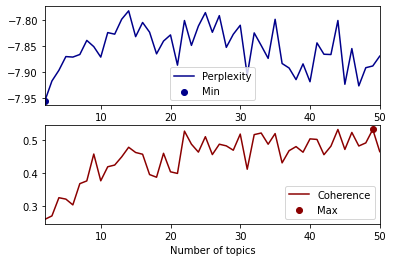

In [ ]:
# Visualize the perplexity and coherence by topics
plt.subplot(2, 1, 1)
plt.plot(models_dict['num_topics'], models_dict['perplexity_scores'], color='darkblue', label='Perplexity')
# Mark the lowest point
xval = models_dict['num_topics'][argmin(models_dict['perplexity_scores'])]
yval = min(models_dict['perplexity_scores'])
plt.scatter(xval, yval, marker='o', color='darkblue', label='Min')
plt.legend()
plt.xlim(min(models_dict['num_topics']), max(models_dict['num_topics']))

plt.subplot(2, 1, 2)
plt.plot(models_dict['num_topics'], models_dict['coherence_scores'], color='darkred', label='Coherence')
# Mark the highest point
xval = models_dict['num_topics'][argmax(models_dict['coherence_scores'])]
yval = max(models_dict['coherence_scores'])
plt.scatter(xval, yval, marker='o', color='darkred', label='Max')
plt.legend()
plt.xlim(min(models_dict['num_topics']), max(models_dict['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [ ]:
best_perplexity = argmin(models_dict['perplexity_scores'])
best_coherence = argmax(models_dict['coherence_scores'])

if best_perplexity == best_coherence:
    # Could use either best_perplexity or best_coherence, since they are equal
    best_num_topics = models_dict['num_topics'][best_perplexity]
    best_model = models_dict['models'][best_perplexity]
    print(f"Optimal number of topics is {best_num_topics} "
    + f"which achieves a perplexity score of {models_dict['perplexity_scores'][best_perplexity]:0.2f} "
    + f"and a coherence score of {models_dict['coherence_scores'][best_coherence]:0.2f}.")
else:
    print("Choose the best model based on your judgement.")
    print(f"The lowest perplexity score was {models_dict['perplexity_scores'][best_perplexity]:0.2f}, "
        + f"with {models_dict['num_topics'][best_perplexity]} topics, and the highest coherence score was "
        + f"{models_dict['coherence_scores'][best_coherence]:0.2f}, "
        + f"with {models_dict['num_topics'][best_coherence]} topics.")
    print('Here are the perplexity and coherence scores:'
      + '\n=============================================')
    print('Number of topics:', models_dict['num_topics'])
    print('Perplexity scores:', [round(score, 2) for score in models_dict['perplexity_scores']])
    print('Coherence scores:', [round(score, 2) for score in models_dict['coherence_scores']])

Choose the best model based on your judgement.
The lowest perplexity score was -7.96, with 2 topics, and the highest coherence score was 0.53, with 49 topics.
Here are the perplexity and coherence scores:
Number of topics: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Perplexity scores: [-7.96, -7.92, -7.9, -7.87, -7.87, -7.87, -7.84, -7.85, -7.87, -7.82, -7.83, -7.8, -7.78, -7.83, -7.8, -7.82, -7.87, -7.84, -7.83, -7.89, -7.8, -7.85, -7.81, -7.79, -7.82, -7.79, -7.85, -7.83, -7.81, -7.91, -7.82, -7.85, -7.87, -7.8, -7.88, -7.89, -7.91, -7.88, -7.92, -7.84, -7.87, -7.87, -7.8, -7.92, -7.85, -7.93, -7.89, -7.89, -7.87]
Coherence scores: [0.26, 0.27, 0.33, 0.32, 0.3, 0.37, 0.38, 0.46, 0.38, 0.42, 0.43, 0.45, 0.48, 0.46, 0.46, 0.4, 0.39, 0.46, 0.4, 0.4, 0.53, 0.49, 0.46, 0.51, 0.46, 0.49, 0.48, 0.47, 0.52, 0.41, 0.52, 0.52, 0.49, 0.52, 0.43, 0.47, 

In [ ]:
# Choose the model with 9 topics (the 7th index)
chosen_index = 7
print('Chosen number of topics:', models_dict['num_topics'][chosen_index])
best_model = models_dict['models'][chosen_index]

Chosen number of topics: 9


## Save the topics

In [ ]:
num_topics = best_model.num_topics

In [ ]:
topic_list = best_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

Estimate names for each topic and save the topics to a .csv file

In [ ]:
sample_topic_names = []
all_words = []

for topic in topic_list:
    # A tuple of (topic_num, word_list)
    # We need to access the second item, word_list
    wrd_list = []
    for item in topic[1]:
        # A tuple of (word, probability)
        # We need to access the first item, word
        wrd_list.append(item[0])
    all_words.append(wrd_list)
    sample_topic_names.append(get_topic_name(wrd_list))

with open('./news_topics.csv', mode='wt') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Topic'] + sample_topic_names)
    for i in range(len(all_words[0])):
        one_row = []
        for topic in all_words:
            one_row.append(topic[i])
        csv_writer.writerow([f'Word {i+1}'] + one_row)

## Visualize LDA model

In [ ]:
# Prepare the visualization
import pyLDAvis
import pyLDAvis.gensim_models
lda_viz = pyLDAvis.gensim_models.prepare(best_model, gensim_corpus, gensim_dict, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_viz)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


# 11: Feature-label correlation
2-Apr-2022

## Purpose
Choose two linguistic features that may be correlated with a numerical label (number of "stars" given in a review). Then, find the number of times each feature occurs in each review and compute correlation coefficients for those features with the label.

## Potential features
Good
- Exclamation points
- Shorter, but full sentences
- Use of proper names (giving shout-outs to people by name)

Bad
- Longer (word count)
- Long sentences (fewer periods, many conjunctions) 
- All caps
- Imperative ("Don't go here. No bueno.")
- Negative words (don't, never, won't, no)
 * https://www.grammarly.com/blog/negatives/
- Absolutes (none, never, always, every)
- Addresses the reader ("_you_ should never buy this.")
- The word _this_ ("_this_ is the worst place ever!")
- Use of euphemisms instead of correct names


## Chosen features
* **Avg. sentence length**. Hypothesis: positive reviews have shorter, but complete, sentences. Negative reviews have longer, drawn-out and rambling sentences that describe the details of a negative experience.
* **Percentage of words in all caps**. Hypothesis: negative reviews use all-caps as a way to express anger or strong emotion.


## Resources
* [Yelp dataset documentation](https://www.yelp.com/dataset/documentation/main)

In [ ]:
# Assignment 11, LING 360, Text Analytics in Python
# Updated on: 2-Apr-2022
# Author: Ryan Parker

# ==================================================
# Determine relationship between linguistic features
# and a numeric label
# ==================================================
'''
Author: Ryan Parker
Updated on: 2-Apr-2022

Purpose: Choose two linguistic features that may be correlated 
with a numeric label (number of "stars" given in a review). 
Then, find the number of times each feature occurs in each review 
and compute correlation coefficients for those features with the label.
Finally, create regression plots (scatter plot with regression line) 
showing the relationship between each linguistic feature and the label.
'''

import pandas as pd                 # Tabular data manipulation
import json                         # JSON parsing
import re                           # RegEx pattern matching
import matplotlib.pyplot as plt     # General-purpose plotting library
import seaborn as sns               # Statistical plotting library

In [ ]:
# Open the .JSON file and write its data to
# a Python dictionary called json_data
with open('./yelp_AZ_2018.json', mode='rt') as jsonfile:
    # json_data = json.load(onefile)
    json_data = [json.loads(line) for line in jsonfile]

print(f"There are {len(json_data):,d} reviews")

There are 119,376 reviews


In [ ]:
df = pd.DataFrame(json_data)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38
1,vBRxlgkpDTXjWiYBp1V6GA,wNyiw6GfVfn5Kphqmux1gw,5OZlLXjU0FXUbrw8Scja6g,1.0,0,0,0,They keep there appointments on time and are p...,2018-02-01 19:01:16
2,ReFXQwEtx_qyjC-G8RPviQ,Hxs41092f4HDP-q9_Q-RhA,smIh1HppyfXphiGMJPnZDg,5.0,0,0,0,My company hosted a dinner and awards night at...,2018-04-27 18:32:25
3,RKGH2ZQHyBNgJwQ84lKMFg,pHKISjytTmP0LrP952_32w,xS5HGqgk0KY2jFWU-l_nrA,4.0,0,0,0,I'm not that familiar with Scottsdale so I'm j...,2018-09-25 03:54:06
4,_HZMf8j6F0jx0nUlea5m2g,v7FPnMzdbl6J7U_8H1BWZA,zk3AimWhuz0EZsNgIddKdg,1.0,1,0,0,"Awful place. Staff is not nice, very rude. Th...",2018-01-09 21:27:45


In [ ]:
# Remove unnecessary columns
df = df[['stars', 'text']]
df.head()

,stars,text
0,1.0,Today was my second out of three sessions I ha...
1,1.0,They keep there appointments on time and are p...
2,5.0,My company hosted a dinner and awards night at...
3,4.0,I'm not that familiar with Scottsdale so I'm j...
4,1.0,"Awful place. Staff is not nice, very rude. Th..."


RegEx patterns for my chosen features:
* [Sentence length](https://pythex.org/?regex=%5B.%3F!%5D%7B1%2C%7D&test_string=%22Wow.%20What%20an%20amazing%20product!%20I%20mean%2C%20incredible%2C%20right%3F!%22&ignorecase=0&multiline=0&dotall=0&verbose=0): `re.findall(pattern=r'[.?!]{1,}', string=review_text)`, which returns a list of end-of-sentence punctuation (ignoring repeat-punctuation like '?!', '!!!', or '...'). I find the `len()` of that list, then I find `len(review_text.split())` (the word count) and divide the word count by the number of sentences to get the average sentence length (words per sentence).
* [Percentage of words (2+ characters) in all caps](https://pythex.org/?regex=%5BA-Z%5D%7B2%2C%7D&test_string=I%20DON%27T%20RECOMMEND%20THIS%20PRODUCT!!!%20BAD%20EXPERIENCE!!!%20Let%20me%20share%20the%20details%3A%20I%20was%20walking%20down%20the%20road%2C%20when%20BAM%2C%20the%20product%20fell%20from%20the%20sky%20and%20then%20totally%20made%20my%20day%20rough%20--%20and%20I%20didn%27t%20do%20anything%20to%20deserve%20it!%20So%20now%20you%20know%2C%20don%27t%20buy%20that%20product.&ignorecase=0&multiline=0&dotall=0&verbose=0): `re.findall(r"[A-Z]{2,}", string=review_text)`, which returns a list of words in all caps, so long as the words have 2 or more letters. I find the `len()` of that list, and divide it by the total word count in the review to get the percentage of words in all caps.

In [ ]:
# test_sentence = "Wow. What an amazing product! I mean, incredible, right?!"
test_sentence = "I DON'T RECOMMEND THIS PRODUCT!!! BAD EXPERIENCE!!! Let me share the details: I was walking down the road, when BAM, the product fell from the sky and then totally made my day rough -- and I didn't do anything to deserve it! So now you know, don't buy that product."

num_sentences = re.findall(r'[.?!]{1,}', string=test_sentence)
print(f"End-of-sentence punctuation found: {num_sentences}")
print(f"Number of sentences: {len(num_sentences)}")
print(f"Avg sentence length: {len(test_sentence.split()) / len(num_sentences):.1f} words")
print()

num_all_caps_words = re.findall(r"[A-Z]{2,}", string=test_sentence)
print(f"Words in all caps: {num_all_caps_words}")
print(f"Number of words in all caps: {len(num_all_caps_words)}")
print(f"Percentage of words in all caps: {len(num_all_caps_words) / len(test_sentence.split()):.2f}")

End-of-sentence punctuation found: ['!!!', '!!!', '!', '.']
Number of sentences: 4
Avg sentence length: 12.5 words

Words in all caps: ['DON', 'RECOMMEND', 'THIS', 'PRODUCT', 'BAD', 'EXPERIENCE', 'BAM']
Number of words in all caps: 7
Percentage of words in all caps: 0.14


In [ ]:
# Test of sentence length function
test_lambda = lambda review_text: len(review_text.split()) / len(re.findall(r'[.?!]{1,}', review_text))

# Avg words per sentence
test_lambda(test_sentence)

12.5

In [ ]:
# Test of all-caps function
test_lambda = lambda review_text: len(re.findall(r'[A-Z]{2,}', review_text)) / len(review_text.split())

# Pct of all-caps words
test_lambda(test_sentence)

0.14

In [ ]:
# Full functions
def avg_sentence_length(review_text):
    '''
    Returns the average number of words per sentence
    in the input `review_text`.
    '''
    num_words = len(review_text.split())
    num_sentences = len(re.findall(r'[.?!]{1,}', review_text))

    # Ensure the number of sentences is at least 1
    # to prevent ZeroDivisionError
    if num_sentences == 0:
        num_sentences = 1

    return num_words / num_sentences



def all_caps_pct(review_text):
    '''
    Returns the percentage of words (2+ characters)
    that are in ALL CAPS.
    '''
    num_words_all_caps = len(re.findall(r'[A-Z]{2,}', review_text))
    num_words = len(review_text.split())

    # Ensure the number of words is at least 1
    # to prevent ZeroDivisionError
    if num_words == 0:
        num_words = 1

    return num_words_all_caps / num_words

In [ ]:
# Create columns for linguistic features
df['All_caps_pct'] = df['text'].apply(lambda review_text: all_caps_pct(review_text))
df['Avg_sentence_length'] = df['text'].apply(lambda review_text: avg_sentence_length(review_text))

# Save as a .csv file
df[['stars', 'All_caps_pct', 'Avg_sentence_length']].to_csv('./Parker_11.csv', index=False)

df.head()

,stars,text,All_caps_pct,Avg_sentence_length
0,1.0,Today was my second out of three sessions I ha...,0.000000,22.433333
1,1.0,They keep there appointments on time and are p...,0.000000,21.444444
2,5.0,My company hosted a dinner and awards night at...,0.008065,17.714286
3,4.0,I'm not that familiar with Scottsdale so I'm j...,0.000000,12.750000
4,1.0,"Awful place. Staff is not nice, very rude. Th...",0.000000,9.333333


In [ ]:
# Show correlation
corr = df[['stars', 'All_caps_pct', 'Avg_sentence_length']].corr()
corr

,stars,All_caps_pct,Avg_sentence_length
stars,1.000000,-0.069694,-0.149376
All_caps_pct,-0.069694,1.000000,-0.022585
Avg_sentence_length,-0.149376,-0.022585,1.000000


In [ ]:
# Heatmap versions
# See: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas/50703596#50703596
# and: https://datatofish.com/correlation-matrix-pandas/

corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

,stars,All_caps_pct,Avg_sentence_length
stars,1.00,-0.07,-0.15
All_caps_pct,-0.07,1.00,-0.02
Avg_sentence_length,-0.15,-0.02,1.00


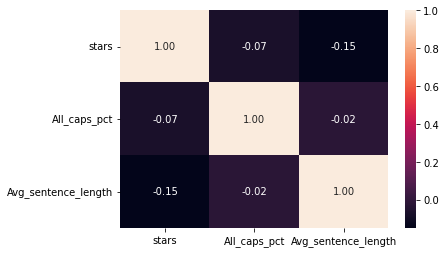

In [ ]:
sns.heatmap(df[['stars', 'All_caps_pct', 'Avg_sentence_length']].corr(), annot=True, fmt='.2f');

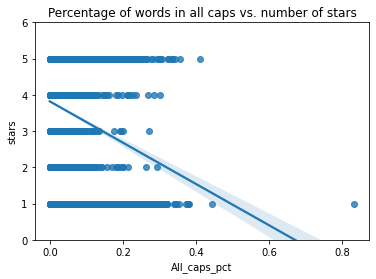

In [ ]:
# Show scatter plots and regression lines
# See: http://seaborn.pydata.org/tutorial/regression.html
sns.regplot(x=df['All_caps_pct'], y=df['stars'])
plt.title('Percentage of words in all caps vs. number of stars')
plt.ylim(0, 6)
plt.show()

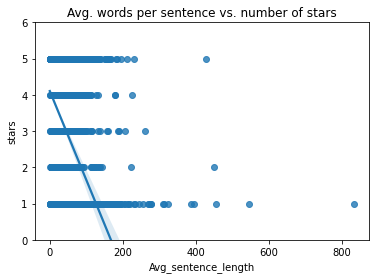

In [ ]:
sns.regplot(x=df['Avg_sentence_length'], y=df['stars'])
# Or, for just the scatter plot
# df.plot.scatter(x='Avg_sentence_length', y='stars')
# or simply
# plt.scatter(x=df['Avg_sentence_length'], y=df['stars'])
plt.title('Avg. words per sentence vs. number of stars')
plt.ylim(0, 6)
plt.show()

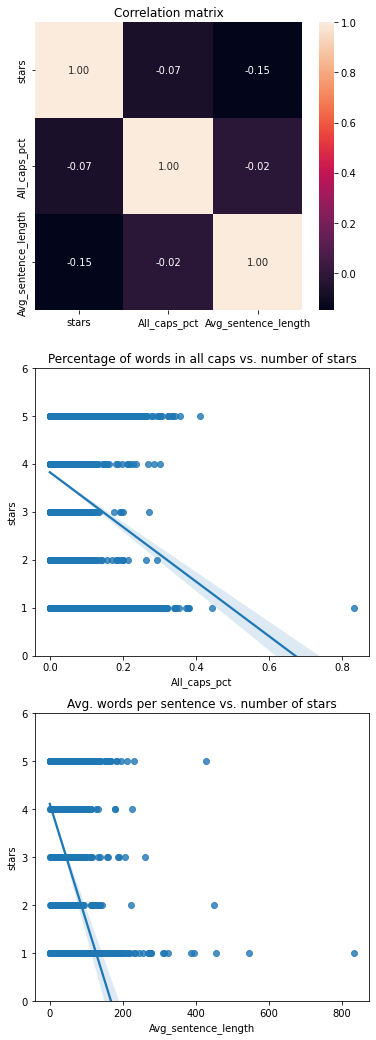

In [ ]:
# All plots together
fig, (ax_corr, ax_caps, ax_sent) = plt.subplots(3, figsize=(6, 18))

# Create plots
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax_corr)
sns.regplot(x=df['All_caps_pct'], y=df['stars'], ax=ax_caps)
sns.regplot(x=df['Avg_sentence_length'], y=df['stars'], ax=ax_sent)

# Set titles
ax_corr.set_title('Correlation matrix')
ax_caps.set_title('Percentage of words in all caps vs. number of stars')
ax_sent.set_title('Avg. words per sentence vs. number of stars')

# Adjust limits
ax_caps.set_ylim(0, 6)
ax_sent.set_ylim(0, 6)

# Display the plots
plt.show()

## Test accuracy of RegEx patterns

In [ ]:
# Ask user to confirm metrics
def confirm_accuracy(sample_list):
    '''
    Confirm function accuracy by asking a user to 
    supply values in place of the functions.

    Returns a dictionary of the form:
    ```python
    {
        'Text': sample_list,
        'Num all caps': [],
        'Num sents': [],
        'Function all caps': [],
        'Function sents': [],
    }
    ```
    Also, princs precision and recall, where
    precision and recall are calculated as:
    precision = (num_correct_predictions / total_predictions)
    recall = (num_correct_predictions / num_true_values)
    '''
    return_dict = {
        'Text': sample_list,
        'All caps count': [],
        'Sents count': [],
        'Function all caps': [],
        'Function sents': []
    }

    for n, review_text in enumerate(sample_list):
        print(f'Review text: {n+1}/{len(sample_list)}')
        print('-'*20)
        # Add a newline after each sentence to make them easier to read.
        print(re.sub(r'([.?!]{1,})', r'\1\n', review_text))
        print('-'*20)
        sent_count = int(input('How many sentences are in the review text above? '))
        all_caps_count = int(input('How many words in ALL CAPS are in the review text above? '))
        print('='*20)
        print('\n')

        # Collect metrics by function
        function_sent_count = len(re.findall(r'[.?!]{1,}', review_text))
        function_all_caps_count = len(re.findall(r"[A-Z]{2,}", review_text))

        # Save values
        return_dict['All caps count'].append(all_caps_count)
        return_dict['Sents count'].append(sent_count)
        return_dict['Function all caps'].append(function_all_caps_count)
        return_dict['Function sents'].append(function_sent_count)
    
    # Calculate precision and recall
    # precision = (num_correct_predictions / total_predictions)
    # recall = (num_correct_predictions / num_true_values)

    # Currently, recall is set to the inverse of precision since the 
    # RegEx patterns haven't missed correct matches, they have just caught
    # some that are not correct.
    print(f"Precision, count of all caps: {sum(return_dict['All caps count']) / sum(return_dict['Function all caps']):.3f}")
    print(f"Recall, count of all caps: {sum(return_dict['Function all caps']) / sum(return_dict['All caps count']):.3f}")
    print(f"Precision, sentence count: {sum(return_dict['Sents count']) / sum(return_dict['Function sents']):.3f}")
    print(f"Recall, sentence count: {sum(return_dict['Function sents']) / sum(return_dict['Sents count']):.3f}")
    
    return return_dict

In [ ]:
# Get a sample of data
sample = df['text'].sample(n=20, random_state=1)
sample = sample.to_list()

user_input = confirm_accuracy(sample)

Review text:
--------------------
The food is made to order.
 We waited for about a few minutes for them to prepare it.
 It was worth the wait.
 The rice was so full of flavor and fluffy.
 The machaca was so juicy and had a robust flavor not over powering.
 Everything was so fresh and hot.
 I recommend this place.

--------------------
How many sentences are in the review text above? 7
How many words in ALL CAPS are in the review text above? 0


Review text:
--------------------
This place has amazing food!
 I got the eggplant entree with the rosemary and garlic naan and of course rice.
 It was delicious!
 The portions are big so I had leftovers for lunch the next day and I wanted more!
 
I went on a Friday night and it was pretty empty which was nice- no waiting for a table or waiting forever to get our orders.
 The staff was very friendly and personable.
 
I would definitely recommend going here!

--------------------
How many sentences are in the review text above? 7
How many words 

In [ ]:
# Currently, recall is set to the inverse of precision since the 
# RegEx patterns haven't missed correct matches, they have just caught
# some that are not correct.
print(f"Precision, count of all caps: {sum(user_input['All caps count']) / sum(user_input['Function all caps']):.3f}")
print(f"Recall, count of all caps: {sum(user_input['Function all caps']) / sum(user_input['All caps count']):.3f}")
print(f"Precision, sentence count: {sum(user_input['Sents count']) / sum(user_input['Function sents']):.3f}")
print(f"Recall, sentence count: {sum(user_input['Function sents']) / sum(user_input['Sents count']):.3f}")

Precision, count of all caps: 0.556
Recall, count of all caps: 1.800
Precision, sentence count: 0.968
Recall, sentence count: 1.033
